# init

In [ ]:
# demo: loads file with all messages (CSTARTTIME, CSENDERENDPOINTID, ymdhm )
# show some charts, anomaly detection with LSTM autoencoders

In [173]:
import base.dfBasics as dfBasics
import base.common as common
import base.encoder as encoder
import base.pfAdapt as pfAdapt
import base.charts as charts
import base.anomaly as anomaly

import pandas as pd    
from pyspark.sql import functions

Setup Complete
Setup Complete


In [174]:
sparkSession = dfBasics.getSparkSession()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/11/10 10:55:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/11/10 10:55:18 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).


### list directory

In [175]:
from os import listdir

def listdirectory(path=None,filter='.'):
    return [x for x in listdir(path) if not x.startswith(filter)]    

_files = listdirectory(path='/tmp/enc')

In [176]:
len(_files)

4867

In [177]:
senders = sparkSession.read.parquet("/tmp/senders.parquet")
senders = list(senders.toPandas()['CSENDERENDPOINTID'])
#len(senders)

In [178]:
import pandas as pd
sf = pd.read_csv('/tmp/directory_sizes.txt', delimiter = "\t")
sf.columns =['size','file']
sf.drop(sf.tail(1).index,inplace=True) # drop last n rows

In [179]:
sf = sf.sort_values(['size'])
sf.iloc[len(sf)-1].file
#sf

'enc/sla_enc_a2dc2460-a796-11e9-b569-14e0ac1b495c_a771d9a0-869b-11e9-b822-0ff9ac1b495c.parquet'

In [413]:
sf

,size,file
5867,0,enc/sla_enc_a9f4cfa5-ee06-11eb-a6ae-1758ac1e12...
1985,0,enc/sla_enc_b1ae3740-9c30-11eb-9829-4c38ac1e12...
3579,0,enc/sla_enc_39eef620-f0cb-11e9-8b88-0b60ac1b49...
3578,0,enc/sla_enc_39eef620-f0cb-11e9-8b88-0b60ac1b49...
3577,0,enc/sla_enc_f83f0400-d695-11e7-9c83-b607ac1b49...
...,...,...
2925,77816,enc/sla_enc_a60ba950-e67e-11e8-be62-528eac1b49...
865,79076,enc/sla_enc_e1b2df80-a796-11e9-b569-14e0ac1b49...
2982,94244,enc/sla_enc_6611a1d0-e758-11e8-be62-528eac1b49...
4536,102096,enc/sla_enc_a2dc2460-a796-11e9-b569-14e0ac1b49...


### load data

In [180]:
df = sparkSession.read.parquet('/tmp/' + sf.iloc[len(sf)-1].file)
pfall = df.toPandas()

In [ ]:
df = sparkSession.read.parquet('/tmp/enc/' + _files[1])
pfall = df.toPandas() 

In [ ]:
pfall

### work

In [ ]:
for file in _files:
    try:
        print(file)
        df = sparkSession.read.parquet('/tmp/enc/' + file)
        pfall = df.toPandas() 
    except Exception as exception:    
        pass

In [ ]:
pfall

In [ ]:
senders=senders[19:]
len(senders)

In [ ]:
1579760627614 - 1579760619146

In [ ]:

#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/CSENDERENDPOINTID/CSENDERENDPOINTID_9.parquet')
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_1580137124017.parquet')
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/sla/sla_1616754087742.parquet')
#df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/CSENDERENDPOINTID/CSENDERENDPOINTID_2191.parquet')
df = sparkSession.read.parquet('hdfs://172.30.17.145:8020/user/admin/CSENDERENDPOINTID_full/CSENDERENDPOINTID_9.parquet')
pfall = df.toPandas() 

In [ ]:
CSENDERENDPOINTID=9

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col
SparkSession.builder.config('spark.local.dir', '/tmp').config("spark.executor.memory", "8g").config("spark.driver.memory", "8g").config("spark.driver.maxResultSize", "0").appName("jupyter").master("spark://clspromon-aio01.txx.seeburger.de:7077").getOrCreate()

In [ ]:
import numpy as np
import pandas as pd

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col

sparkSession = SparkSession.builder.config('spark.local.dir', '/tmp').config("spark.executor.memory", "8g").config("spark.driver.memory", "8g").config("spark.driver.maxResultSize", "0").appName("jupyter").master("spark://clspromon-aio01.txx.seeburger.de:7077").getOrCreate()

In [ ]:
sparkSession.getActiveSession()

## functions

In [181]:
## Setup charts
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

def get_ym_string(a,b) :
    return a + "-" + b
    #return a.join(["-",b]) 

def get_ym(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    return a,b

def get_ymd(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    return a,b,c

def make_2digits(blist):
    for n, b in enumerate(blist):
        if int(b) < 10:
             blist[n] = '0' + str(b)
    return blist

def get_ymd_string(a,b,c) :
    if isinstance(a, str) :
        return a + "-" + make_2digits([b])[0] + "-" + make_2digits([c])[0] 
    elif isinstance(a,pd.core.series.Series):
        return a.astype(str) + "-" + make_2digits(b.astype(str)) + "-" + make_2digits(c.astype(str))
    return a + "-" + pd.Index(make_2digits(b.tolist())) + "-" + pd.Index(make_2digits(c.tolist())) 

def get_ymdh(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    d = mdcountsall.index.get_level_values(3).astype(str)
    return a,b,c,d

def get_ymdhm(mdcountsall) :
    a = mdcountsall.index.get_level_values(0).astype(str)
    b = mdcountsall.index.get_level_values(1).astype(str)
    c = mdcountsall.index.get_level_values(2).astype(str)
    d = mdcountsall.index.get_level_values(3).astype(str)
    e = mdcountsall.index.get_level_values(4).astype(str)
    return a,b,c,d,e

def get_ymdh_string(a,b,c,d) :
    if isinstance(a, str) :
        return a + "-" + make_2digits([b])[0] + "-" + make_2digits([c])[0] + "-" + make_2digits([d])[0]
    elif isinstance(a,pd.core.series.Series):
        return a.astype(str) + "-" + make_2digits(b.astype(str)) + "-" + make_2digits(c.astype(str)) + "-" + make_2digits(d.astype(str))
    return a + "-" + pd.Index(make_2digits(b.tolist())) + "-" + pd.Index(make_2digits(c.tolist())) + "-" + pd.Index(make_2digits(d.tolist()))

def get_ymdhm_string(a,b,c,d,e) :
    if isinstance(a, str) :
        return a + "-" + make_2digits([b])[0] + "-" + make_2digits([c])[0] + "-" + make_2digits([d])[0] + "-" + make_2digits([e])[0]
    elif isinstance(a,pd.core.series.Series):
        return a.astype(str) + "-" + make_2digits(b.astype(str)) + "-" + make_2digits(c.astype(str)) + "-" + make_2digits(d.astype(str)) + "-" + make_2digits(e.astype(str))
    return a + "-" + pd.Index(make_2digits(b.tolist())) + "-" + pd.Index(make_2digits(c.tolist())) + "-" + pd.Index(make_2digits(d.tolist())) + "-" + pd.Index(make_2digits(e.tolist()))


def createData_ym(pfall,month) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['month'] == month)].groupby(['year','month'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month'])['year'].count()    
    a,b = get_ym(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ym_string(a,b)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData(pfall,month=-1,year=2020,outcome='outcome') :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour'])['year'].count()    
    a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2[outcome] =  mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int)

    #for pivot table
    data2['hours'] =  d.astype(int) 
    data2['days']  =  c.astype(int) 
    return data2


def createData_ymd(pfall,month,year=2020) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day'])['year'].count()    
    a,b,c = get_ymd(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymd_string(a,b,c)
    data2['year'] = a.astype(int) 
    data2['month'] = b.astype(int) 
    data2['day'] = c.astype(int) 
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData_ymdh(pfall,month,year=2020) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour'])['year'].count()    
    a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2['year'] = a.astype(int) 
    data2['month'] = b.astype(int) 
    data2['day'] = c.astype(int) 
    data2['hour'] = d.astype(int)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2

def createData_ymdhm(pfall,month,year=2020) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour','minute'])['year'].count()
    else :
        mdcountsall = pfall.groupby(['year','month','day','hour','minute'])['year'].count()    
    a,b,c,d,e = get_ymdhm(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(a,b,c,d)
    data2['year'] = a.astype(int) 
    data2['month'] = b.astype(int) 
    data2['day'] = c.astype(int) 
    data2['hour'] = d.astype(int)
    data2['minute'] = e.astype(int)
    data2['outcome'] = mdcountsall.reset_index(level=0, drop=True).reset_index()['year'].astype(int) 
    return data2


def createData_column_ymdh(pfall,month=-1,year=2020, column=None) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)]
    else :
        mdcountsall = pfall 
    #a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymdh_string(pfall['year'], pfall['month'], pfall['day'],pfall['hour'])
    df2 = mdcountsall[['year', 'month', 'day','hour',column]].copy()
    data2 = pd.concat([data2, df2], axis=1)
    data2.columns = list(data2.columns[:-1]) + ['outcome']
    
    return data2


def createData_column_ymd(pfall,month=-1,year=2020, column=None) :
    if (month > 0) & (month < 13) :
        mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)]
    else :
        mdcountsall = pfall 
    #a,b,c,d = get_ymdh(mdcountsall)
    data2 = pd.DataFrame()
    data2['date'] = get_ymd_string(pfall['year'], pfall['month'], pfall['day'])
    df2 = mdcountsall[['year', 'month', 'day',column]].copy()
    data2 = pd.concat([data2, df2], axis=1)
    data2.columns = list(data2.columns[:-1]) + ['outcome']
    
    return data2


def label(graph,skip,rot) :
    for ind, label in enumerate(graph.get_xticklabels()):
        if ind % skip == 0:  # every 10th label is kept
            label.set_visible(True)
            label.set_rotation(rot)
        else:
            label.set_visible(False)

def createBarplot(md=None,fx=24,fy=12,fontscale=3.0,title="") :
    sns.set(style='whitegrid', palette='muted', font_scale=fontscale)
    plt.figure(figsize=(fx,fy))
    plt.title(title)
    ax = sns.barplot(x=md['date'], y=md['outcome'], data=md)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
    plt.tight_layout()
    plt.show()
    return ax

## heatmap
def createHeatmap(piv,title="") :
    plt.figure(figsize=(24,8))
    plt.title(title)
    ax = sns.heatmap(piv, square=True)
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
    plt.tight_layout()
    plt.show()
    return ax

Setup Complete


In [182]:
#pfall
#pfall5 = createData_column_ymdh(pfall,column='CMESSAGETAT2')
#get_ymdh_string(pfall5['year'], pfall5['month'], pfall5['day'],pfall5['hour'])
#pfall5['year']
#pfall5['year'].astype(str) + '_' + make_2digits(pfall5['month'].astype(str))
#make_2digits([c])[0] 

#pfall5.columns = pfall5.columns[:-1] + 'outcome'
#pfall5.columns = list(pfall5.columns[:-1]) + ['outcome']
#pfall5

In [183]:
#year=2022
#month=7
#mdcountsall = pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()

In [184]:
#pfall

In [185]:
#checka(pfall[(pfall[year]== 2022) & (pfall[month]== 7)])
#pfall[(pfall[year]== '2022') & (pfall[month]== '7')]
#pfall[(pfall[year] == 2022)] 
#pfall
#pfall5 = createData_column_ymdh(pfall,column='CMESSAGETAT2')
#pfall6 = checka(pfall5)
#pd.unique(pfall5['year'])

### check

In [186]:
from calendar import monthrange

def get_month(pda, year=2020, month=1):
    return pda[(pda['month'] == month) & (pda['year'] == year)]

def is_complete(pda, year=2020, month=1):
    mm = pda[(pda['month'] == month) & (pda['year'] == year)]
    if len(mm) > 0:
        return monthrange(year, month)[1] == len(mm)
    return None
    
def check_complete(pda, year=2020):
    for m in range(1, 13):
        mm = pda[(pda['month'] == m) & (pda['year'] == year)]
        if len(mm) > 0:
            print(m,monthrange(year, m)[1] == len(mm))

            
def add_line_to_dataframe(df=None,year=None,month=None,day=None,hour=None,minute=None,value=0): 
    
    if hour is not None:
        if minute is not None:
            _date = get_ymdhm_string(str(year),str(month),str(day),str(hour),str(minute)) 
            df.loc[len(df)]=[_date,year,month,day,hour,minute,value]  
        else:    
            _date = get_ymdh_string(str(year),str(month),str(day),str(hour)) 
            df.loc[len(df)]=[_date,year,month,day,hour,value]   
    else:    
        _date = get_ymd_string(str(year),str(month),str(day))
        df.loc[len(df)]=[_date,year,month,day,value]     
    
def check_and_fill_hours_of_day(df=None,year=2022,month=7,day=None):
    _df=df[(df['year']==year) & (df['month']==month) & (df['day']==day)] 
    #print(_df)
    
    minutes = False
    if 'minute' in df.columns:
        minutes = True
    
    for hour in range(0, 24):
        if len(_df[_df['hour']==hour]) == 0:
            if minutes == True:
                for minute in range(0, 59):
                    #_date = get_ymdhm_string(str(year),str(month),str(day),str(hour),str(minute))  
                    add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour,minute=minute) 
            else:
                #_date = get_ymdh_string(str(year),str(month),str(day),str(hour))  
                add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour) 
        else:
            if minutes == True:
                _df2 = _df[_df['hour']==hour]
                for minute in range(0, 59):
                    if len(_df2[_df2['minute']==minute]) == 0:
                        add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour,minute=minute)
            else:
                pass
    #print (df)        
    return df     
    
    
#pda :  date,year,month,day.outcome 
def fill(pda,year,month,min_day=1,max_day=-1,hours=False): 
    if max_day == -1:
        days = monthrange(year, month)[1]
    else:
        days = max_day
        
    #print(min_day,days,max_day,hours)     
    minutes = False
    if 'minute' in pda.columns:
        minutes = True
        
    df = pda[(pda['month'] == month) & (pda['year'] == year)]
    for day in range(min_day, days + 1):
        if len(df[df['day']==day]) == 0:
            #print(day)
            if hours == True:
                for hour in range (0,24):
                    if minutes == True:
                        for minute in range(0, 59): 
                            add_line_to_dataframe(df=pda,year=year,month=month,day=day,hour=hour,minute=minute) 
                    else:
                        add_line_to_dataframe(df=pda,year=year,month=month,day=day,hour=hour) 
            else:    
                add_line_to_dataframe(df=pda,year=year,month=month,day=day)
        else:
            if hours == True:
                #print(year,month,day)
                check_and_fill_hours_of_day(df=pda,year=year,month=month,day=day)
       
    
def check(pda):
    _start_year = min(pd.unique(pda['year']))
    _end_year = max(pd.unique(pda['year']))  
    _start_month = min(pd.unique(pda[pda['year']== _start_year]['month']))
    _end_month = max(pd.unique(pda[pda['year']== _end_year]['month']))
    _end = 13
    
    if 'hour' in pda.columns:
        hours = True
    else:
        hours = False
        
    for year in range(_start_year,_end_year+1):   
        for month in range(_start_month,_end):        
            #print(year,month, _end_month, _end_year)
            
            if((month == _start_month) & (year == _start_year)):
                min_day = (min(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                min_day = 1
                
            if((month == _end_month) & (year == _end_year)):
                max_day = (max(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
                #print(month,year,max_day)
                fill(pda,year,month,min_day=min_day, max_day=max_day,hours=hours)
            else:    
                fill(pda,year,month,min_day=min_day,hours=hours)
            if (year == _end_year) &  (month == _end_month):
                #print('DONE')
                break    
        _start_month=1
            
        if year == (_end_year-1):
            _end = _end_month + 1     
            
        if (year == _end_year) &  (month == _end_month):
            #print('DONE')
            break       
            

### checka

In [187]:
# 2019-10-29-00
# 2022-10-06-23

def mean_column(column):
    return int(round(column.mean(),0))

def check_and_fill_hours_of_daya(df=None,year=2022,month=7,day=None, outcome='outcome'):
    _df=df[(df['year']==year) & (df['month']==month) & (df['day']==day)] 
    
    df=pd.DataFrame(columns=['date', 'year', 'month', 'day', 'hour', outcome])
    for hour in range(0, 24):
        _hours = _df[_df['hour']==hour]
        if len(_df[_df['hour']==hour]) == 0:
            _date = get_ymdh_string(str(year),str(month),str(day),str(hour))  
            add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour) 
            pass
        else:
            add_line_to_dataframe(df=df,year=year,month=month,day=day,hour=hour,value=mean_column(_hours[outcome]))
    #print (df)      
    return df 

#pda :  date,year,month,day.outcome 
def filla(pda,year,month,min_day=1,max_day=-1,hours=False, outcome='outcome'): 
    if max_day == -1:
        days = monthrange(year, month)[1]
    else:
        days = max_day
        
    #df = pda[(pda['month'] == month) & (pda['year'] == year)]
    if hours == True:
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', 'hour', outcome])
    else:
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', outcome])
        
    for day in range(min_day, days + 1):
        if hours == True:
            df_b = check_and_fill_hours_of_daya(df=pda,year=year,month=month,day=day,outcome=outcome)
            df = pd.concat([df, df_b], ignore_index=True)   
        else:
            _df=pda[(pda['year']==year) & (pda['month']==month) & (pda['day']==day)]
            if len(_df) > 0 :
                #print(len(_df),mean_column(_df['outcome']), list(_df['outcome']))
                value=mean_column(_df[outcome])
            else:
                value=0
            add_line_to_dataframe(df=df,year=year,month=month,day=day,value=value) 
    return df   
            
    
def checka(pda, outcome='outcome'):
    _start_year = min(pd.unique(pda['year']))
    _end_year = max(pd.unique(pda['year']))  
    _start_month = min(pd.unique(pda[pda['year']== _start_year]['month']))
    _end_month = max(pd.unique(pda[pda['year']== _end_year]['month']))
    _end = 13
    
    if 'hour' in pda.columns:
        hours = True
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', 'hour', outcome])
    else:
        hours = False
        df=pd.DataFrame(columns=['date', 'year', 'month', 'day', outcome])
    
    
    for year in range(_start_year,_end_year+1):   
        for month in range(_start_month,_end):        
            #print(year,month, _end_month, _end_year)
            
            if((month == _start_month) & (year == _start_year)):
                min_day = (min(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                min_day = 1
                
            if((month == _end_month) & (year == _end_year)):
                max_day = (max(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
                #print(month,year,max_day)
                df_b = filla(pda,year,month,min_day=min_day, max_day=max_day,hours=hours,outcome=outcome)
                df = pd.concat([df, df_b], ignore_index=True)
            else:    
                df_b =  filla(pda,year,month,min_day=min_day,hours=hours,outcome=outcome)
                df = pd.concat([df, df_b], ignore_index=True)
            if (year == _end_year) &  (month == _end_month):
                #print('DONE')
                break    
        _start_month=1
            
        if year == (_end_year-1):
            _end = _end_month + 1     
            
        if (year == _end_year) &  (month == _end_month):
            #print('DONE')
            break       
    return df        
           

In [188]:
def get_date_list(pda, hours=False):
    _start_year = min(pd.unique(pda['year']))
    _end_year = max(pd.unique(pda['year']))  
    _start_month = min(pd.unique(pda[pda['year']== _start_year]['month']))
    _end_month = max(pd.unique(pda[pda['year']== _end_year]['month']))
    _end = 13
    
    _date_list = []
    
    for year in range(_start_year,_end_year+1):   
        for month in range(_start_month,_end):        
            #print(year,month, _end_month, _end_year)
            
            if((month == _start_month) & (year == _start_year)):
                min_day = (min(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                min_day = 1
            
            if((month == _end_month) & (year == _end_year)):
                days = (max(list(pda[(pda['month'] == month) & (pda['year'] == year)]['day'])))
            else:
                days = monthrange(year, month)[1]
            
            for day in range(min_day, days + 1):
                if hours == True:
                    for hour in range(0, 24):
                        _date = get_ymdh_string(str(year),str(month),str(day),str(hour)) 
                        _date_list.append(_date) 
                else:
                    _date = get_ymd_string(str(year),str(month),str(day))
                    _date_list.append(_date)    
            
            if (year == _end_year) &  (month == _end_month):
                #print('DONE')
                break    
        _start_month=1
            
        if year == (_end_year-1):
            _end = _end_month + 1     
            
        if (year == _end_year) &  (month == _end_month):
            #print('DONE')
            break       
    return _date_list        
           

In [189]:
def check_and_fill_hours_of_month(dataframe=None,year=2022,month=7):
    
    days=pd.unique(dataframe['days'])
    _start_day = min(days)
    _end_day   = max(days)  

    for day in range(_start_day,_end_day+1):
        _df=dataframe[dataframe['days']==day] 
        for hour in range(0, 24):
            if len(_df[_df['hours']==hour]) == 0:
                _date = get_ymdh_string(str(year),str(month),str(day),str(hour))  
                #print([_date,0,hour,day])
                dataframe.loc[len(dataframe)]=[_date,0,hour,day]
    return dataframe       

In [190]:
def check_complete(dataframe=None,year=2020):
    for m in range(1, 13):
        #print(m)
        mm = dataframe[(dataframe['month'] == m) & (dataframe['year'] == year)]
        print(m,monthrange(year, m)[1] == len(mm))

def fill1(pda,year,month):        
    days = monthrange(year, month)[1]
    df = pda[(pda['month'] == month) & (pda['year'] == year)]
    for day in range(1, days + 1):
        if len(df[df['day']==day]) == 0:
            pda.loc[len(pda)]=[get_ymd_string(str(year),str(month),str(day)),year,month,day,0]
    

In [191]:
def unique(pfall):
    return pd.unique(pfall['CRECEIVERENDPOINTID']), pd.unique(pfall['CSTATUS']), pd.unique(pfall['CSERVICE']), pd.unique(pfall['CSENDERPROTOCOL']), pd.unique(pfall['CRECEIVERPROTOCOL'])

#un=unique(pfall)
#unique(pfall[pfall['CRECEIVERENDPOINTID']==725])

#pfall0 = pfall[pfall['CRECEIVERENDPOINTID']==un[0][1]]
#pda = createData_ymd(pfall0,0)

#del pda['index'] 

In [192]:
class Time(object):         
    def __init__(self,year=None,month=None,day=None):
        self.year  = self._int_value(year)
        self.month = self._int_value(month)
        self.day   = self._int_value(day)
    
    def _int_value(self,value):
        if value == '' or value == None:
            return None
        return int(value)
        

class TimeRange(object):    
    def __init__(self,dataframe=None,year_from=None,month_from=None,day_from=None,year_to=None,month_to=None,day_to=None):
        if dataframe is None:
            self.start = Time(year=year_from,month=month_from,day=day_from).__dict__
            self.end   = Time(year_to,month_to,day_to).__dict__
        else:
            #print(dataframe)
            year_from = min(pd.unique(dataframe['year']))
            year_to = max(pd.unique(dataframe['year']))  
            month_from = min(pd.unique(dataframe[dataframe['year']== year_from]['month']))
            month_to = max(pd.unique(dataframe[dataframe['year']== year_to]['month']))
            day_from = min(pd.unique(dataframe[(dataframe['year']== year_from) & (dataframe['month'] == month_from)]['day']))
            day_to = max(pd.unique(dataframe[(dataframe['year']== year_to) & (dataframe['month'] == month_to)]['day']))
            self.start = Time(year_from,month_from,day_from).__dict__
            self.end   = Time(year_to,month_to,day_to).__dict__
            
#TimeRange(dataframe=pfall).__dict__  

def set_date_widget_value(element, value):
    if value != None:
        element.value = str(value)
    else:
        element.value = ''

def init_date_widget(_res):
    _range = TimeRange(dataframe=_res)
    set_date_widget_value(year_from, _range.start['year'])
    set_date_widget_value(month_from, _range.start['month'])
    set_date_widget_value(day_from, _range.start['day'])
    
    set_date_widget_value(year_to, _range.end['year'])
    set_date_widget_value(month_to, _range.end['month'])
    set_date_widget_value(day_to, _range.end['day'])

In [193]:
def createHeatmapPfall(pfall=None,sender='all',month=1,year=2020,values='outcome',index='hours',columns='days'):
    #print(month,year)
    global data2
    global piv
    data2 = createData(pfall,month,year=year)
    piv = pd.pivot_table(data2, values=values,index=[index], columns=[columns], fill_value=0)
    #titlestring = "CSENDERENDPOINTID: " + str(topsender.iloc[7]['CSENDERENDPOINTID']) + ": "+ category + " so far = " + str(topsender.iloc[7]['outcome']) + " , month: " + str(month) 
    #titlestring = "CSENDERENDPOINTID: " + str(topsender.iloc[7]['CSENDERENDPOINTID']) + ": "+ category  + " month: " + str(month) 
    titlestring ="number messages " + str(year) + "-" + str(month) + "  " + sender
    sns.set(style='whitegrid', palette='muted', font_scale=1.2)
    createHeatmap(piv, titlestring)

In [194]:
def on_value_submit_month(change):
    #adapt_all()    
    sender=0
   
    with out:
        clear_output()
        month=int(month_from.value)
        year=int(year_from.value)
        createHeatmapPfall(pfall0,"endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID),month=month, year=year)
        #print(int(month_from.value), year_from.value)
        #createHeatmapPfall(pfall=pfall,sender='all',month=1,year=2020)
        
        md2 = createData_ymd(pfall0,month,year=year)
        ax=createBarplot(md2,fx=24,fy=12,fontscale=3.0,title="number messages " + "endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID))
        label(ax,1000,90)

## work

In [ ]:
make_2digits([4])

pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
del pfall1['index']
del pfall1['CGLOBALMESSAGEID']

pfall0 = pfall
pda = createData_ymdh(pfall0,0)

check(pda)
pfall1 = pda

In [ ]:
pfall.columns


In [ ]:
pd.unique(pfall['CRECEIVERENDPOINTID'])

In [ ]:
#A

In [ ]:
CRECEIVERENDPOINTID=725

In [ ]:
pfall0 = pfall[pfall['CRECEIVERENDPOINTID']==725]
pda = createData_ymd(pfall0,0)

In [ ]:
# B
pfall0 = pfall
pda = createData_ymd(pfall0,0)

In [ ]:
pda = pda.sort_values(['date']).reset_index()   

In [ ]:
del pda['index'] 

In [ ]:
pda

In [ ]:
#check_complete(dataframe=pda, year=2022)
check(pda)
#pda
get_month(pda, year=2022, month=10)

In [ ]:
#A
fill(pda,2019,11)     
fill(pda,2019,12) 
fill(pda,2020,1)
fill(pda,2020,2)
fill(pda,2020,3)
fill(pda,2020,4)
fill(pda,2020,5)
fill(pda,2020,6)
fill(pda,2020,7)
fill(pda,2020,8)
fill(pda,2020,9)
fill(pda,2020,10)
fill(pda,2020,11)
fill(pda,2020,12)
fill(pda,2021,1)
fill(pda,2021,2)
fill(pda,2021,3)
pda = pda.sort_values(['date']).reset_index()

In [ ]:
pfall1 = pda

## create data

In [195]:
make_2digits([4])

pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
del pfall1['index']
del pfall1['CGLOBALMESSAGEID']

pfall0 = pfall
pda = createData_ymd(pfall0,0)

check(pda)
pda_day = pda.sort_values(['date']).reset_index()
#pfall1 = pda

In [196]:
pda_hour = createData_ymdh(pfall0,0)
check(pda_hour)
pda_hour = pda_hour.sort_values(['date']).reset_index()

In [ ]:
#pda_minute = createData_ymdhm(pfall0,0)

In [ ]:
#check(pda_minute)
#pda_minute = pda_minute.sort_values(['date']).reset_index()

In [197]:
#_column = 'CINBOUNDSIZE'
_column='CMESSAGETAT2'
pfall5 = createData_column_ymd(pfall,column=_column)
pda_CMESSAGETAT2_day = checka(pfall5 ).sort_values(['date'])

In [198]:
#_column = 'CINBOUNDSIZE'
_column='CMESSAGETAT2'
pfall5 = createData_column_ymdh(pfall,column=_column)
pda_CMESSAGETAT2_hour = checka(pfall5 ).sort_values(['date'])
#pda_CINBOUNDSIZE_hour = checka(pfall5 ).sort_values(['date'])

### EKG

In [47]:
#https://www.renom.jp/notebooks/tutorial/time_series/lstm-anomalydetection/notebook.html
!ls /home/jovyan/work/cls/jupyter/qtdbsel102.txt
!ls /tmp

/home/jovyan/work/cls/jupyter/qtdbsel102.txt
blockmgr-5897056e-952d-4c7e-a3f3-d27d60aa1adc
directory_sizes.txt
enc
hsperfdata_jovyan
hsperfdata_root
liblz4-java-15212615354691011997.so
liblz4-java-15212615354691011997.so.lck
null_values.parquet
pip-ephem-wheel-cache-n5pbb42w
pip-install-8w_dsp7f
pip-req-tracker-j7595cxh
__pycache__
senders.parquet
sla_enc_772e6440-e973-11e8-be62-528eac1b495c.parquet
sla_enc.parquet
sla.parquet
spark-7631230b-d970-4f56-bc8d-75c3e69b2222
spark-b65691be-dad5-44db-bc30-b8b1122e026a
spx.csv
tmpf_k1tcff.py
tmpgwozkhk0.py
tmptvg6687i.py


In [65]:
spx_df =  pd.read_csv('/home/jovyan/work/cls/jupyter/spx.csv', parse_dates=['date'], index_col='date')

,close
date,
1986-01-02,209.59
1986-01-03,210.88
1986-01-06,210.65
1986-01-07,213.80
1986-01-08,207.97
...,...
2018-06-25,2717.07
2018-06-26,2723.06
2018-06-27,2699.63


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

In [137]:
ecg_df = pd.read_csv('/home/jovyan/work/cls/jupyter/qtdbsel102.txt', header=None, delimiter='\t')

length of ECG data :  45000


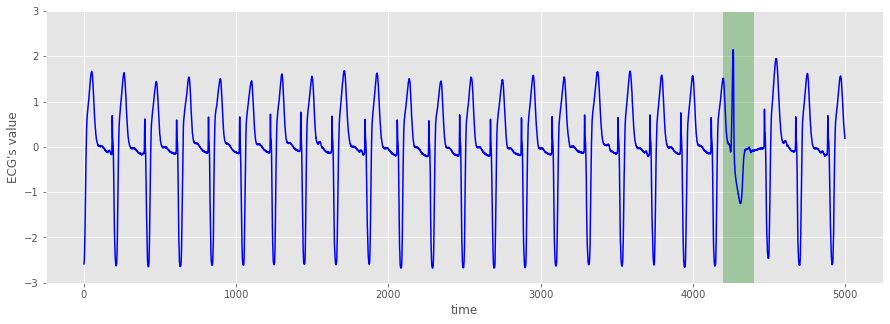

In [6]:
df = pd.read_csv('/home/jovyan/work/cls/jupyter/qtdbsel102.txt', header=None, delimiter='\t')
ecg = df.iloc[:,2].values
ecg = ecg.reshape(len(ecg), -1)
print('length of ECG data : ', len(ecg))

# standardize
scaler = StandardScaler()
std_ecg = scaler.fit_transform(ecg)

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(np.arange(5000), std_ecg[:5000], color='b')
plt.ylim(-3, 3)
x = np.arange(4200,4400)
y1 = [-3]*len(x)
y2 = [3]*len(x)
plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
plt.show()


In [ ]:
normal_cycle = ecg[5000:]
test = ecg[:5000]

In [ ]:
df

### null values

In [ ]:
def null_value_percent_column(df,column='outcome'):
    return len(df[df[column] == 0]) / len(df)
    
print(null_value_percent_column(pda_day))
print(null_value_percent_column(pda_hour))

In [ ]:
dnull = pda_hour[(pda_hour['year'] == 2022)&(pda_hour['month'] == 7)]
_null_column= dnull['outcome'] == 0

In [ ]:
dnull['null'] = _null_column.astype(int)

In [ ]:
dnull[dnull['null'] == 1]




In [ ]:
def createHeatmap2(data2,sender='all',month=1,year=2020,values='outcome',index='hours',columns='days'):
    piv = pd.pivot_table(data2, values=values,index=[index], columns=[columns], fill_value=0)
    titlestring ="number messages " + str(year) + "-" + str(month) + "  " + sender
    sns.set(style='whitegrid', palette='muted', font_scale=1.2)
    createHeatmap(piv, titlestring)

createHeatmap2(dnull,sender='all',month=7,year=2022,values ='null',index='hour',columns='day')

### work

In [ ]:
from datetime import time
import datetime as dt
import calendar
import pytz
de = pytz.timezone('Europe/Berlin')

# long timestamp
def date(x):
    return  dt.datetime.fromtimestamp(float(x) / 1e3, tz=de)


def adddatecolumns(data,pf,column) :
    data['year'] = pf[column].apply(lambda x: date(x).date().year)
    data['month'] = pf[column].apply(lambda x: date(x).date().month)
    data['day'] = pf[column].apply(lambda x: date(x).date().day)
    data['hour'] = pf[column].apply(lambda x: date(x).time().hour)
    data['minute'] = pf[column].apply(lambda x: date(x).time().minute)
    #data['second'] = pf[column].apply(lambda x: x.time().second)
    #data['microsecond'] = pf[column].apply(lambda x: x.time().microsecond)

def converttimestampcolumnn(pf,tsc) :
    pf[tsc] = pf[tsc].apply(lambda x: dt.datetime.fromtimestamp(float(x) / 1e3))

In [ ]:
pfall0['minute'] = pfall0['CSTARTTIME'].apply(lambda x: date(x).time().minute)

In [ ]:
pfall0

In [ ]:
_df=pd.DataFrame(columns=['file_name', 'day', 'hour'])
_df.loc[len(_df)]=['name',null_value_percent_column(pda_day),null_value_percent_column(pda_hour)] 
_df.loc[len(_df)]=['name',null_value_percent_column(pda_day),null_value_percent_column(pda_hour)] 
_df.to_parquet('/tmp/null_values.parquet')

In [ ]:
import pandas as pd
null_percent = pd.read_parquet('/tmp/null_values.parquet')
null_percent_day.columns = ['file', 'day', 'hour']

In [ ]:
null_percent_day = null_percent.sort_values(['day'])

In [ ]:
_file = null_percent_day.iloc[0]['file']
#df = sparkSession.read.parquet('/tmp/enc/' + _file)

_file1 = null_percent_day.iloc[1]['file']
#df = sparkSession.read.parquet('/tmp/enc/' + _file , '/tmp/enc/' + _file1)
df = sparkSession.read.parquet(*flist)

pfall9 = df.toPandas() 

len(pfall9)

In [ ]:
pfall = pfall9

In [ ]:
listi = list(null_percent_day['file'])
flist = ",".join('/tmp/enc/' + s for s in listi).split(',')



In [ ]:
len(pfall9)
pfall9
flist = ['/tmp/enc/' + _file , '/tmp/enc/' + _file1]
type (flist)

In [ ]:
_df=pd.DataFrame(columns=['file', 'day', 'hour'])
for file in _files:
    try:
        #print(file)
        df = sparkSession.read.parquet('/tmp/enc/' + file)
        pfall = df.toPandas() 
        
        make_2digits([4])

        pfall1 = pfall.sort_values(['year','month','day','hour']).reset_index()
        del pfall1['index']
        del pfall1['CGLOBALMESSAGEID']

        pfall0 = pfall
        pda = createData_ymd(pfall0,0)

        check(pda)
        pda_day = pda.sort_values(['date']).reset_index()
        
        pda_hour = createData_ymdh(pfall0,0)
        check(pda_hour)
        pda_hour = pda_hour.sort_values(['date']).reset_index()
        
        _df.loc[len(_df)]=[file,null_value_percent_column(pda_day),null_value_percent_column(pda_hour)] 
        _df.to_parquet('/tmp/null_values.parquet')
    except Exception as exception:    
        pass

In [ ]:
pfall[pfall['year'] == 2022]

In [ ]:
pda_CMESSAGETAT2_hour

In [ ]:
pfall1

In [ ]:

   
#pda.reset_index()
#del(pda['index'])
#pfall2 = pda[(pda['year']==2019) & (pda['month']==10)].sort_values(['date']).reset_index()
pfall2 = pda[(pda['year']==2021)].sort_values(['date']).reset_index()
del pfall2['index']
#del pfall2['level_0']
pfall2

In [ ]:
check(pfall2)
pfall2.sort_values(['date']).reset_index()


In [ ]:
#pfall2.sort_values(['date']).reset_index()
pfall2[(pfall2['year']==2019) & (pfall2['month']==10)].sort_values(['date']).reset_index()

#check(pfall2)

In [ ]:
#del pfall2['index']
#check(pfall2)
pfall2 = pfall2[(pfall2['year']==2019)].sort_values(['date']).reset_index()
pfall2


## visualization

In [ ]:
pda
md = createData_ym(pfall1,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by all endpoints")

In [ ]:
#md
# 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) 
#del pfall1['index']
pfall1

In [ ]:
md2 = createData_ymdh(pfall1,7,year=2022)
ax=createBarplot(md2,fx=24,fy=12,fontscale=3.0,title="number messages sent by all endpoints")
label(ax,1000,90)

### Graph

In [ ]:
md3=createData(pda_CMESSAGETAT2_hour,7,year=2022)
#md3=md3[(md3['days'] == 11) | (md3['days'] == 12) | (md3['days'] == 13)].reset_index()
#del(md3['index'])
_df =  check_and_fill_hours_of_month(dataframe=md3,year=2022,month=7).sort_values(['date']).reset_index()     

fig = plt.figure(figsize=(18,9))
plt.plot(_df.index, _df.outcome, label='msg count');

In [ ]:
_df = pda_CMESSAGETAT2_hour
_df = _df[(_df['year'] == 2022) & (_df['month'] == 7) ].reset_index()  
#_df = _df[(_df['year'] == 2022) & (_df['month'] == 7) & (_df['day'] == 12)].reset_index() 

fig = plt.figure(figsize=(18,9))
plt.plot(_df.index, _df.outcome, label='msg count');

In [ ]:
_df

In [ ]:
 

pfall2 = pfall1[(pfall1['year'] == 2022) & (pfall1['month'] == 7)  & (pfall1['day'].isin([10,11,12,13]))].sort_values(['date'] )
del(pfall2['index'])
check(pfall2)
pfall2=pfall2.sort_values(['date'] ).reset_index()
del(pfall2['index'])

In [ ]:

fig = plt.figure(figsize=(18,9))
plt.plot(pfall2.index, pfall2.outcome, label='msg count');
#plt.plot(pfall2.date, pfall2.outcome, label='msg count');

In [ ]:
md3

In [ ]:
md3

In [ ]:
# pfall[(pfall['year'] == year) & (pfall['month'] == month)].groupby(['year','month','day','hour'])['year'].count()
md2['outcome'].sum()    

In [ ]:
createHeatmapPfall(pfall=pfall,sender='all',month=7,year=2022)

### hbox init

In [ ]:
layout2 = {'width': '400px'}

year_from   = widgets.Text(description = 'year',value = '2020', style=style, layout=layout2,disabled=False)   
year_to     = widgets.Text(description = 'to',value = '', style={'description_width': '20px'}, layout={'width': '200px'},disabled=False)  
#year_hbox = widgets.HBox([year_from,year_to])
year_hbox = widgets.HBox([year_from])

#month  = widgets.Text(description = 'month',value = '', style=style, layout=layout,disabled=False) 
month_from   = widgets.Text(description = 'month',value = '1', style=style, layout=layout2,disabled=False)   
month_to     = widgets.Text(description = 'to',value = '', style={'description_width': '20px'}, layout={'width': '200px'},disabled=False)  
#month_hbox   = widgets.HBox([month_from,month_to])
month_hbox   = widgets.HBox([month_from])

day_from   = widgets.Text(description = 'day',value = '', style=style, layout=layout2,disabled=False)   
day_to     = widgets.Text(description = 'to',value = '', style={'description_width': '20px'}, layout={'width': '200px'},disabled=False)  
day_hbox   = widgets.HBox([day_from,day_to])

month_from.on_submit(on_value_submit_month)
year_from.on_submit(on_value_submit_month)

out = widgets.Output()

display (year_hbox,month_hbox,out)
#init_date_widget(pfall)  

In [ ]:
#data2
#TimeRange(dataframe=pfall).__dict__
_pf = pfall.drop_duplicates(subset=['month','day','year'])
#_pf[(_pf['month'] == 1) & (_pf['year'] == 2020)]
_pf = pfall[['month','day','year']].drop_duplicates()

_days = len(_pf[(_pf['month'] == 10) & (_pf['year'] == 2019)]) \
+ len(_pf[(_pf['month'] == 11) & (_pf['year'] == 2019)]) \
+ len(_pf[(_pf['month'] == 12) & (_pf['year'] == 2019)]) \
+ len(_pf[(_pf['month'] == 1) & (_pf['year'] == 2020)]) \
+ len(_pf[(_pf['month'] == 2) & (_pf['year'] == 2020)]) \
+ 18 , len(_pf)
_days[0] / _days[1]

In [ ]:
TimeRange(dataframe=pfall).__dict__

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# new

In [ ]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', MinMaxScaler())])

In [ ]:
pfall1= pfall6

# Time Series Anomaly Detection with LSTM Autoencoders (selected sender)

In [199]:
def get_trained_period(anomalyEnc):
    return anomalyEnc.train.index[0], anomalyEnc.train.index[len(anomalyEnc.train.index)-1]

def get_test_period(anomalyEnc):
    return anomalyEnc.test.index[0], anomalyEnc.test.index[len(anomalyEnc.test) -1]

def get_period(pfall,percent = 1.0):
    max_index = int(len(pfall1) * percent)
    return pfall.iloc[pfall.index[0]]['date'], pfall.iloc[pfall.index[max_index -1]]['date']

def get_percent(pfall1,year=None,month=None,day=None,hour=None):
    _pfall = pfall1[(pfall1['year'] == year) & (pfall1['month'] == month)]
    if day != None:
        _pfall = _pfall[(_pfall['day'] == day)]
    if hour != None:
        _pfall = _pfall[(_pfall['hour'] == hour)]
    
    index = _pfall.index[len(_pfall.index)-1]    
    #print(index)
    index = pfall1.index.get_loc(index)
    
    return (index + 1) / len(pfall1)
    #return _pfall.index
    
def get_index_period(pfall):
    max_index = int(len(pfall) * percent) -1
    return pfall.index[0], pfall.index[max_index]
    


In [ ]:
    
print(get_trained_period(anomalyEnc1), get_test_period(anomalyEnc1))
print(get_trained_period(anomalyEnc2), get_test_period(anomalyEnc2))
print(get_trained_period(anomalyEnc3), get_test_period(anomalyEnc3))
print(get_trained_period(anomalyEnc4), get_test_period(anomalyEnc4))
#print(get_period(pfall1,0.7))
#get_percent(pfall1,year=2022,month=6,day=None,hour=None)

In [ ]:
_pfall = pda_hour
_pfall.index[len(_pfall.index)-1]
_pfall.index.get_loc('2022-10-06-23')
#get_percent(pda_hour,year=2022,month=6,day=None,hour=None)
len(_pfall.index)-1

index = _pfall.index.get_loc('2022-06-30-23')
#(index + 1) , len(_pfall)
index, len(_pfall)
get_percent(pda_hour,year=2022,month=6,day=None,hour=None)


In [ ]:
anomalyEnc.train.index
pfall1.iloc[17908 - 1]
#int(len(pfall1) * TRAIN_SIZE)
pfall1
#int(len(pfall1) * 1.0)
year = 2022
month = 10
day = 4
hour = 23
index = pfall1[(pfall1['year'] == year) & (pfall1['month'] == month) & (pfall1['day'] == day) & (pfall1['hour'] == hour)].index[0]
(index + 1) / len(pfall1)

print(get_period(pfall1,get_percent(pfall1,year=2022,month=6,day=None,hour=None)))
#len(get_percent(pfall1,year=2022,month=10,day=None,hour=None))

In [ ]:
TRAIN_SIZE = 0.7
train_size = int(len(pfall1) * TRAIN_SIZE)
test_size = len(pfall1) - TRAIN_SIZE

### train models

In [200]:
def replace_index_by_date_column(df):
    df.set_index(df['date'], inplace=True)
    #del df['index']
    #del df['date']


In [207]:
import AnomalyDetectionLSTMAutoencoder

def train_model(dataframe=None, time_steps=30, year=2022,month=6,day=None,hour=None):
    anomalyEnc = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = time_steps)
    #anomalyEnc.initAndTrain_divide(dataframe, get_percent(dataframe,year=year,month=month,day=day,hour=hour))
    
    anomalyEnc.df1 = anomalyEnc.createDataframe(dataframe)
    perc_train = get_percent(dataframe,year=year,month=month,day=day,hour=hour)
    train, test = anomalyEnc.getTrainAndTest(anomalyEnc.df1,perc_train)
    anomalyEnc.initAndTrain(train=train, test=test)
    
    return anomalyEnc

In [3]:
def numpy_to_dataframe(b):
    _df = pd.DataFrame()
    _df['outcome'] = b.reshape([1, len(b)])[0]
    return _df

Index(['close'], dtype='object')

In [71]:
anomalyEnc2 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
spx_df.columns = ['outcome']
anomalyEnc2.df1 = anomalyEnc2.createDataframe(spx_df)
train, test = anomalyEnc2.getTrainAndTest(anomalyEnc2.df1,0.7)
anomalyEnc2.initAndTrain(train=train, test=test)

/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
161/161 [==============================] - 9s 34ms/step - loss: 0.1864 - val_loss: 0.1037
Epoch 2/10
161/161 [==============================] - 5s 30ms/step - loss: 0.1201 - val_loss: 0.1102
Epoch 3/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0943 - val_loss: 0.0754
Epoch 4/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0894 - val_loss: 0.0950
Epoch 5/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0943 - val_loss: 0.0726
Epoch 6/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0874 - val_loss: 0.0852
Epoch 7/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0823 - val_loss: 0.0818
Epoch 8/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0798 - val_loss: 0.0883
Epoch 9/10
161/161 [==============================] - 5s 31ms/step - loss: 0.0786 - val_loss: 0.1066
Epoch 10/10
161/161 [==============================] - 5s 30ms/step - loss: 0.0752 - val_lo

In [61]:
test

,close
5734,"25-Sep-08,1209.18"
5735,"26-Sep-08,1213.01"
5736,"29-Sep-08,1106.39"
5737,"30-Sep-08,1166.36"
5738,"01-Oct-08,1161.06"
...,...
8187,"25-Jun-18,2717.07"
8188,"26-Jun-18,2723.06"
8189,"27-Jun-18,2699.63"
8190,"28-Jun-18,2716.31"


In [58]:
spx_df.columns = ['outcome']

anomalyEnc2 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
anomalyEnc2.initAndTrain_divide(spx_df,0.7)

TypeError: initAndTrain() got multiple values for argument 'train'

In [250]:
normal_cycle = numpy_to_dataframe(ecg[5000:])
test = numpy_to_dataframe(ecg[:5000])

anomalyEnc = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 100, OUTCOME='outcome')
anomalyEnc.initAndTrain(train=normal_cycle, test=test)

Epoch 1/10
1123/1123 [==============================] - 111s 96ms/step - loss: 0.0950 - val_loss: 0.0433
Epoch 2/10
1123/1123 [==============================] - 107s 95ms/step - loss: 0.0676 - val_loss: 0.0307
Epoch 3/10
1123/1123 [==============================] - 107s 95ms/step - loss: 0.0608 - val_loss: 0.0264
Epoch 4/10
1123/1123 [==============================] - 107s 95ms/step - loss: 0.0572 - val_loss: 0.0226
Epoch 5/10
1123/1123 [==============================] - 108s 96ms/step - loss: 0.0547 - val_loss: 0.0237
Epoch 6/10
1123/1123 [==============================] - 110s 98ms/step - loss: 0.0532 - val_loss: 0.0257
Epoch 7/10
1123/1123 [==============================] - 110s 98ms/step - loss: 0.0525 - val_loss: 0.0245
Epoch 8/10
1123/1123 [==============================] - 107s 95ms/step - loss: 0.0515 - val_loss: 0.0228
Epoch 9/10
1123/1123 [==============================] - 107s 95ms/step - loss: 0.0507 - val_loss: 0.0233
Epoch 10/10
1123/1123 [==============================] 

In [ ]:
anomalyEnc.OUTCOME
anomalyEnc.initAndTrain(train=normal_cycle, test=test)

In [ ]:
train= normal_cycle

scaler = StandardScaler()
scaler.fit(train[['outcome']])
train[['outcome']]

In [ ]:
replace_index_by_date_column(pda_CINBOUNDSIZE_hour)
pda_CINBOUNDSIZE_hour

In [ ]:
anomalyEnc7 = train_model(dataframe=pda_CINBOUNDSIZE_hour, time_steps=24 * 7, year=2022,month=6)

In [201]:
replace_index_by_date_column(pda_hour)
replace_index_by_date_column(pda_CMESSAGETAT2_hour)
replace_index_by_date_column(pda_day)
replace_index_by_date_column(pda_CMESSAGETAT2_day)

In [478]:
anomalyEncB6 = train_model(dataframe=_pda_hour, time_steps=24, year=2022,month=6)

/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
595/595 [==============================] - 18s 26ms/step - loss: 0.2636 - val_loss: 0.2612
Epoch 2/10
595/595 [==============================] - 14s 24ms/step - loss: 0.2556 - val_loss: 0.2604
Epoch 3/10
595/595 [==============================] - 15s 25ms/step - loss: 0.2547 - val_loss: 0.2605
Epoch 4/10
595/595 [==============================] - 14s 24ms/step - loss: 0.2539 - val_loss: 0.2604
Epoch 5/10
595/595 [==============================] - 15s 24ms/step - loss: 0.2534 - val_loss: 0.2602
Epoch 6/10
595/595 [==============================] - 15s 25ms/step - loss: 0.2530 - val_loss: 0.2604
Epoch 7/10
595/595 [==============================] - 15s 24ms/step - loss: 0.2531 - val_loss: 0.2600
Epoch 8/10
595/595 [==============================] - 14s 24ms/step - loss: 0.2523 - val_loss: 0.2600
Epoch 9/10
595/595 [==============================] - 14s 24ms/step - loss: 0.2525 - val_loss: 0.2603
Epoch 10/10
595/595 [==============================] - 14s 24ms/step - loss: 0.252

In [208]:
anomalyEncC1 = train_model(dataframe=pda_CMESSAGETAT2_day, time_steps=30, year=2022,month=6)
anomalyEncC2 = train_model(dataframe=pda_day, time_steps=30, year=2022,month=6)

anomalyEncC3 = train_model(dataframe=pda_CMESSAGETAT2_hour, time_steps=24 * 7, year=2022,month=6)
anomalyEncC4 = train_model(dataframe=pda_hour, time_steps=24 * 7, year=2022,month=6)

anomalyEncC5 = train_model(dataframe=pda_CMESSAGETAT2_hour, time_steps=24, year=2022,month=6)
anomalyEncC6 = train_model(dataframe=pda_hour, time_steps=24, year=2022,month=6)

/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
27/27 [==============================] - 5s 60ms/step - loss: 0.1052 - val_loss: 0.0620
Epoch 2/10
27/27 [==============================] - 1s 31ms/step - loss: 0.1053 - val_loss: 0.0577
Epoch 3/10
27/27 [==============================] - 1s 33ms/step - loss: 0.1046 - val_loss: 0.0510
Epoch 4/10
27/27 [==============================] - 1s 32ms/step - loss: 0.1023 - val_loss: 0.0516
Epoch 5/10
27/27 [==============================] - 1s 32ms/step - loss: 0.1019 - val_loss: 0.0508
Epoch 6/10
27/27 [==============================] - 1s 31ms/step - loss: 0.1016 - val_loss: 0.0504
Epoch 7/10
27/27 [==============================] - 1s 31ms/step - loss: 0.1002 - val_loss: 0.0512
Epoch 8/10
27/27 [==============================] - 1s 31ms/step - loss: 0.1013 - val_loss: 0.0516
Epoch 9/10
27/27 [==============================] - 1s 30ms/step - loss: 0.0995 - val_loss: 0.0508
Epoch 10/10
27/27 [==============================] - 1s 31ms/step - loss: 0.1000 - val_loss: 0.0507


/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
27/27 [==============================] - 5s 60ms/step - loss: 0.4711 - val_loss: 0.3585
Epoch 2/10
27/27 [==============================] - 1s 31ms/step - loss: 0.4448 - val_loss: 0.3560
Epoch 3/10
27/27 [==============================] - 1s 32ms/step - loss: 0.4395 - val_loss: 0.3569
Epoch 4/10
27/27 [==============================] - 1s 31ms/step - loss: 0.4337 - val_loss: 0.3546
Epoch 5/10
27/27 [==============================] - 1s 30ms/step - loss: 0.4326 - val_loss: 0.3541
Epoch 6/10
27/27 [==============================] - 1s 31ms/step - loss: 0.4265 - val_loss: 0.3491
Epoch 7/10
27/27 [==============================] - 1s 30ms/step - loss: 0.4224 - val_loss: 0.3444
Epoch 8/10
27/27 [==============================] - 1s 31ms/step - loss: 0.4161 - val_loss: 0.3360
Epoch 9/10
27/27 [==============================] - 1s 31ms/step - loss: 0.4110 - val_loss: 0.3317
Epoch 10/10
27/27 [==============================] - 1s 31ms/step - loss: 0.4063 - val_loss: 0.3239


/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
655/655 [==============================] - 108s 160ms/step - loss: 0.0911 - val_loss: 0.0487
Epoch 2/10
655/655 [==============================] - 104s 158ms/step - loss: 0.0911 - val_loss: 0.0485
Epoch 3/10
655/655 [==============================] - 104s 159ms/step - loss: 0.0904 - val_loss: 0.0482
Epoch 4/10
655/655 [==============================] - 105s 160ms/step - loss: 0.0898 - val_loss: 0.0479
Epoch 5/10
655/655 [==============================] - 104s 159ms/step - loss: 0.0892 - val_loss: 0.0478
Epoch 6/10
655/655 [==============================] - 107s 163ms/step - loss: 0.0888 - val_loss: 0.0479
Epoch 7/10
655/655 [==============================] - 105s 160ms/step - loss: 0.0884 - val_loss: 0.0478
Epoch 8/10
655/655 [==============================] - 105s 160ms/step - loss: 0.0880 - val_loss: 0.0479
Epoch 9/10
655/655 [==============================] - 104s 159ms/step - loss: 0.0909 - val_loss: 0.0498
Epoch 10/10
655/655 [==============================] - 104s 159m

/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
655/655 [==============================] - 108s 160ms/step - loss: 0.3028 - val_loss: 0.2859
Epoch 2/10
655/655 [==============================] - 103s 158ms/step - loss: 0.2964 - val_loss: 0.2869
Epoch 3/10
655/655 [==============================] - 104s 159ms/step - loss: 0.2948 - val_loss: 0.2861
Epoch 4/10
655/655 [==============================] - 104s 159ms/step - loss: 0.2925 - val_loss: 0.2858
Epoch 5/10
655/655 [==============================] - 104s 158ms/step - loss: 0.2912 - val_loss: 0.2840
Epoch 6/10
655/655 [==============================] - 103s 158ms/step - loss: 0.2895 - val_loss: 0.2874
Epoch 7/10
655/655 [==============================] - 104s 159ms/step - loss: 0.2871 - val_loss: 0.2832
Epoch 8/10
655/655 [==============================] - 103s 158ms/step - loss: 0.2860 - val_loss: 0.2823
Epoch 9/10
655/655 [==============================] - 103s 158ms/step - loss: 0.2860 - val_loss: 0.2869
Epoch 10/10
655/655 [==============================] - 103s 158m

/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
659/659 [==============================] - 20s 25ms/step - loss: 0.0914 - val_loss: 0.0490
Epoch 2/10
659/659 [==============================] - 16s 25ms/step - loss: 0.0911 - val_loss: 0.0492
Epoch 3/10
659/659 [==============================] - 16s 24ms/step - loss: 0.0905 - val_loss: 0.0489
Epoch 4/10
659/659 [==============================] - 16s 25ms/step - loss: 0.0899 - val_loss: 0.0485
Epoch 5/10
659/659 [==============================] - 16s 25ms/step - loss: 0.0893 - val_loss: 0.0483
Epoch 6/10
659/659 [==============================] - 16s 25ms/step - loss: 0.0887 - val_loss: 0.0483
Epoch 7/10
659/659 [==============================] - 16s 25ms/step - loss: 0.0882 - val_loss: 0.0484
Epoch 8/10
659/659 [==============================] - 16s 24ms/step - loss: 0.0882 - val_loss: 0.0480
Epoch 9/10
659/659 [==============================] - 16s 24ms/step - loss: 0.0883 - val_loss: 0.0483
Epoch 10/10
659/659 [==============================] - 16s 24ms/step - loss: 0.087

/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[self.OUTCOME] = self.scaler.transform(self.train[[self.OUTCOME]])
/home/jovyan/work/cls/jupyter/scray/scray-examples/python/AnomalyDetectionLSTMAutoencoder.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[self.OUTCOME] = self.scaler.transform(self.test[[self.OUTCOME]])


Epoch 1/10
659/659 [==============================] - 20s 25ms/step - loss: 0.3045 - val_loss: 0.2864
Epoch 2/10
659/659 [==============================] - 16s 24ms/step - loss: 0.2951 - val_loss: 0.2839
Epoch 3/10
659/659 [==============================] - 16s 25ms/step - loss: 0.2933 - val_loss: 0.2833
Epoch 4/10
659/659 [==============================] - 16s 24ms/step - loss: 0.2919 - val_loss: 0.2871
Epoch 5/10
659/659 [==============================] - 16s 24ms/step - loss: 0.2900 - val_loss: 0.2829
Epoch 6/10
659/659 [==============================] - 16s 24ms/step - loss: 0.2884 - val_loss: 0.2805
Epoch 7/10
659/659 [==============================] - 16s 25ms/step - loss: 0.2864 - val_loss: 0.2824
Epoch 8/10
659/659 [==============================] - 16s 24ms/step - loss: 0.2849 - val_loss: 0.2884
Epoch 9/10
659/659 [==============================] - 16s 24ms/step - loss: 0.2842 - val_loss: 0.2811
Epoch 10/10
659/659 [==============================] - 16s 24ms/step - loss: 0.282

In [ ]:
pda_hour

In [ ]:
#anomalyEnc4 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 24 * 7)
#anomalyEnc4.initAndTrain(pda_hour, get_percent(pda_hour,year=2022,month=6,day=None,hour=None))

In [ ]:
#anomalyEnc3 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 24 * 7)
#anomalyEnc3.initAndTrain(pda_CMESSAGETAT2_hour, get_percent(pda_CMESSAGETAT2_hour,year=2022,month=6,day=None,hour=None))

In [ ]:
# %%capture
#import AnomalyDetectionLSTMAutoencoder
#anomalyEnc2 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
#anomalyEnc2.initAndTrain(pda_CMESSAGETAT2_day,0.7)
#anomalyEnc2.initAndTrain(pda_CMESSAGETAT2_day, get_percent(pda_CMESSAGETAT2_day,year=2022,month=6,day=None,hour=None))

#anomalyEnc1 = AnomalyDetectionLSTMAutoencoder.AnomalyDetectionLSTMAutoencoder(TIME_STEPS = 30)
#anomalyEnc1.initAndTrain(pda_day,0.7)
#anomalyEnc1.initAndTrain(pda_day, get_percent(pda_day,year=2022,month=6,day=None,hour=None))

In [ ]:
len(pda_hour)

In [ ]:
get_trained_period(anomalyEnc3)

In [ ]:
len(pfall1),  len(anomalyEnc.train), len(anomalyEnc.test), len(anomalyEnc.y_test), len(anomalyEnc.df1), len(anomalyEnc.train), len(anomalyEnc.test),anomalyEnc.TIME_STEPS, len(anomalyEnc.X_train), len(anomalyEnc.y_train)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


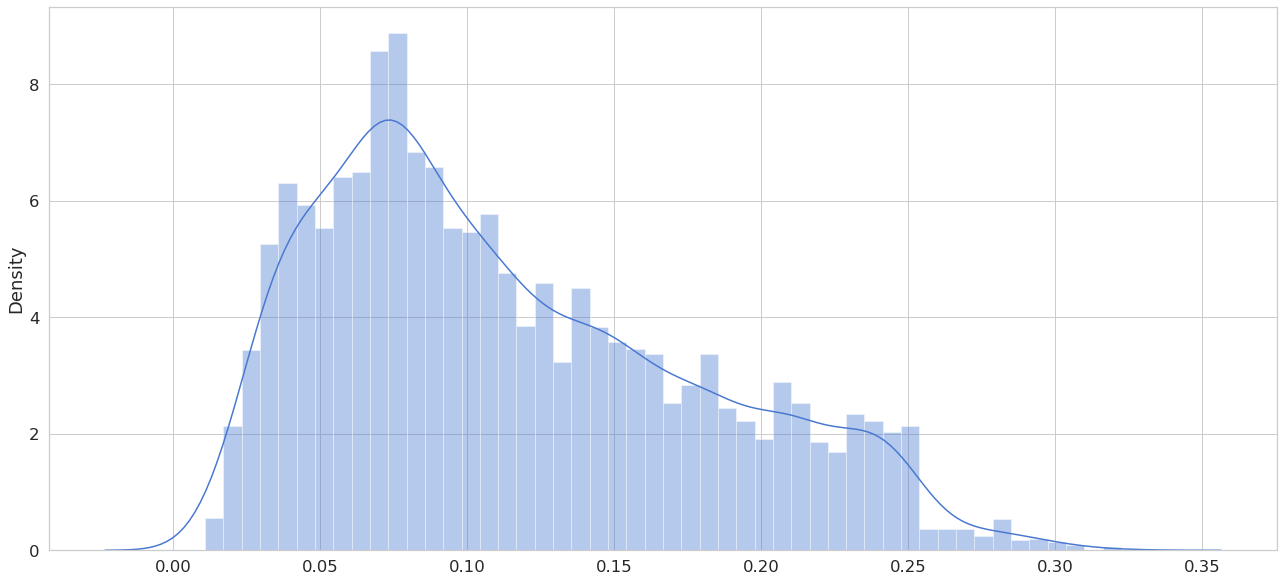

In [101]:
# %%capture
import numpy as np

#anomalyEnc.test_score_df      = anomalyEnc.testScoreDF(anomalyEnc.model, 0.0, anomalyEnc.X_test, anomalyEnc.test)

#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
#data = plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.loss, label='loss')

#y=plt.getp(data[0],'ydata')

#threshold_X = 0.98 * np.max(y)
#threshold_X = np.max(y) - 0.0001
#anomalyEnc.evaluateAnomalies(threshold_X)


data = sns.distplot(anomalyEnc2.train_mae_loss, bins=50, kde=True).get_lines()[0].get_data()

In [10]:
import numpy as np
import ipywidgets as widgets
style = {'description_width': '250px'}
layout = {'width': '600px'}
from IPython.display import display, clear_output

#anomalyEnc.test_score_df      = anomalyEnc.testScoreDF(anomalyEnc.model, 0.0, anomalyEnc.X_test, anomalyEnc.test)

def getThreshold(perc,anomalyEnc):
    out2 = widgets.Output()
    with out2:
        anomalyEnc.test_score_df      = anomalyEnc.testScoreDF(anomalyEnc.model, 0.0, anomalyEnc.X_test, anomalyEnc.test)
        fig = plt.figure(figsize=(12,6))
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
        data = plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.loss, label='loss')
        y=plt.getp(data[0],'ydata')
        plt.show(fig)

    #threshold_X = np.max(y) - 0.025
    return perc * np.max(y)

#out2 = widgets.Output()
#with out2:
#    threshold_X = getThreshold(0.88)
    
#threshold_X    

#anomalyEnc.evaluateAnomalies(threshold_X)

In [ ]:
#anomalyEnc1.X_test

In [ ]:
nomalyEnc2.test_score_df      = anomalyEnc2.testScoreDF(anomalyEnc2.model, 0.0, anomalyEnc2.X_test, anomalyEnc2.test)

In [27]:
def scatterplot(index, values,label):
    return sns.scatterplot(
      x=index,
      y=values,
      color=sns.color_palette()[3],
      s=152,
      label=label
    )
    
def plot_test(test,scaler,anomalies,titlestring,xlabel):

    fig = plt.figure(figsize=(18,9))
    
    plt.plot(
      test[anomalyEnc.TIME_STEPS:].index, 
      #scaler.inverse_transform(test[TIME_STEPS:].close), 
      scaler.inverse_transform(test[anomalyEnc.TIME_STEPS:]),   
      label='msg count'
    );

    #ax = scatterplot(anomalyEnc.anomalies.index, anomalyEnc.scaler.inverse_transform(anomalyEnc.anomalies['close']), 'anomaly')  
    #ax = scatterplot(anomalyEnc.anomalies.index, anomalyEnc.scaler.inverse_transform(anomalyEnc.anomalies), 'anomaly')
    _a=anomalyEnc.anomalies['close']
    _a = pd.DataFrame(_a)
    _a = anomalyEnc.scaler.inverse_transform(_a)
    _a = _a[:, 0]
    #print(_a,type(_a),_a[0],len(_a),len(_a[:, 0]))
    ax = scatterplot(anomalyEnc.anomalies.index, _a, 'anomaly') 
    
    ax.set_xlabel(xlabel)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    plt.xticks(rotation=25)
    plt.legend();

    label(ax,5,80)
    plt.title(titlestring)
    plt.show(fig)


In [ ]:
anomalyEnc.anomalies.index

In [ ]:
anomalyEnc3.anomalies

### Problems / Erwartungsmonitoring

- am 12.07.2022 wurde ein BIS Release installiert dass zur Verzögerung vieler Nachrichten geführt hat.
Die letzten Nachrichten wurden am Folgetag um ca. 15:00 Uhr CET verarbeitet.
Es sollten also deutliche Anomalien zwischen 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) zu sehen sein.


- 13.09.2022 19:00 Uhr / 20:00 Uhr UTC: Massive Last, Anflutung des Systems, vor allem im zweiten Intervall.
Durchlaufzeiten waren deutlich erhöht. 


In [ ]:
data3 = pda_CMESSAGETAT2_hour
_df = pd.DataFrame()        
_df['outcome'] = data3['outcome']
_df.set_index(data3['date'], inplace=True)

In [ ]:
pda_CMESSAGETAT2_hour.set_index(pda_CMESSAGETAT2_hour['date'], inplace=True)

In [ ]:
_df = pda_CMESSAGETAT2_hour
_df = pda_hour

In [ ]:
_df2.index[_df2.index.str.contains('-00')]

In [ ]:
pda_hour

### Problems / Erwartungsmonitoring

- am 12.07.2022 wurde ein BIS Release installiert dass zur Verzögerung vieler Nachrichten geführt hat.
Die letzten Nachrichten wurden am Folgetag um ca. 15:00 Uhr CET verarbeitet.
Es sollten also deutliche Anomalien zwischen 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) zu sehen sein.


- 13.09.2022 19:00 Uhr / 20:00 Uhr UTC: Massive Last, Anflutung des Systems, vor allem im zweiten Intervall.
Durchlaufzeiten waren deutlich erhöht. 


### plot graphs

In [411]:
def plot_graph(_df,contains=None, y='outcome'):
    _df2 = _df[_df.index.str.contains(contains)]

    fig = plt.figure(figsize=(18,9))
    
    hours= False
    
    plt.plot(_df2.index, _df2[y], label=y)
    if len(_df2.index[0].split('-')) == 4:
        hours = True
        ticks=_df2.index[_df2.index.str.contains('-00')]
        ticks2 = list(ticks)
        ticks2.append('2022-07-12-10')
        ticks2.append('2022-07-13-15')
        ticks2.sort()
        ticks = ticks2
    elif len(_df2.index[0].split('-')) == 3:
        ticks=list(_df2.index[_df2.index.str.contains('-01')])  
        for day in range(2,10):
            ticks.remove('2022-01-0' + str(day))
        for day in range(10,32):
            ticks.remove('2022-01-' + str(day)) 
        b=(len(ticks)-1)    
        ticks = ticks[:6] + ['2022-07-12'] + ticks[6:b]     
    else:
        ticks=_df2.index
    #ticks=[_df2.index[0]]
    
    #12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr)
    if hours == False:
        plt.axvline(x='2022-07-12', color="red")
        plt.axvline(x='2022-09-13', color="red")
    else:    
         plt.axvline(x='2022-07-12-10', color="red")
         plt.axvline(x='2022-07-13-15', color="red")
         #plt.axvline(x='2022-09-13-19', color="red")
         #plt.axvline(x='2022-09-13-20', color="red")
       
    #print(ticks)
    
    plt.legend();
    plt.xticks(rotation=80,ticks=ticks)
    plt.show(fig)
    return ticks    



def plot_graph2(test=None, expect=None, column_y='outcome',contains=None, date_from=None, date_to=None):
        
    _test =test
    
    if contains is not None:
        _test = _test[_test.index.str.contains(contains)]
        #anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _test.index.get_loc(date_from)
        _to_index   = _test.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _test = _test.iloc[_from_index:_to_index + 1]
    else:
        pass    
            
    fig = plt.figure(figsize=(18,9))
    plt.plot(_test.index, _test[column_y])       
    
    ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    plt.xticks(rotation=80,ticks=ticks)
    
    if expect is not None:
        #print(_test.index.get_loc(expect[0]),_test.index.get_loc(expect[1]))
        e1=_test.index.get_loc(expect[0])
        e2=_test.index.get_loc(expect[1])
        x = np.arange(e1,e2)
        #x = np.arange(expect[0],expect[1])
        _max = np.max(_test[column_y])
        y1 = [0]*len(x)
        y2 = [_max]*len(x)
        plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
    plt.show()

In [ ]:
#_date = get_ymdh_string(pfall4['year'], pfall4['month'], pfall4['day'],pfall4['hour'])

In [ ]:
pfall4 = pfall[(pfall['year']==2022) & ((pfall['month']==7) | (pfall['month']==6))].reset_index()

In [ ]:
pfall4.columns
#pfall4

In [ ]:
_dates = get_date_list(pfall, hours=False)
#_dates

In [ ]:
_column = 'CSLATAT'
pfall6=checka(pfall4, outcome=_column )
pfall6.set_index(pfall6['date'], inplace=True)

In [ ]:
_column = 'CINBOUNDSIZE'
pfall6=checka(pfall4, outcome=_column )
pfall6.set_index(pfall6['date'], inplace=True)

In [ ]:
#plot_graph(pfall6, contains = '2022-', y=_column ) 
ticks = plot_graph(pfall6, contains = '2022-07-1', y=_column )   

In [ ]:

_column = 'CINBOUNDSIZE'
pfall7 = pda_CINBOUNDSIZE_hour[(pda_CINBOUNDSIZE_hour['year']==2022) & ((pda_CINBOUNDSIZE_hour['month']==7) | (pda_CINBOUNDSIZE_hour['month']==6))].reset_index()
pfall7=checka(pfall7 )
pfall7.set_index(pfall7['date'], inplace=True)

In [ ]:
#pfall7
ticks = plot_graph(pfall7, contains = '2022-07-1', y='outcome' )  

In [ ]:
pfall7[pfall7['outcome'] == 0]

In [ ]:
#data2
#pfall4
#pd.concat([pfall4, _date], axis=1)
#pfall4.set_index(_date, inplace=True)

pfall4['date'] = _date
pfall4

In [ ]:
pfall4.loc['2022-07-07-08']

In [ ]:
pfall4 = pfall4.reset_index()

In [ ]:
plot_graph(pda_day, contains = '2022-')   
plot_graph(pda_CMESSAGETAT2_day, contains = '2022-')  
plot_graph(pda_hour, contains = '2022-07')   
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-07')  

In [ ]:
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-07')  

In [ ]:
plot_graph(pda_hour, contains = '2022-07-')    
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-07-')        
plot_graph(pda_hour, contains = '2022-09-')    
plot_graph(pda_CMESSAGETAT2_hour, contains = '2022-09-')    

### filtered plot

In [349]:
def inverse_transform_anomalies(scaler=None,anomalies=None, column_y='close'):
    _a = anomalies[column_y]
    _a = pd.DataFrame(_a)
    _a = scaler.inverse_transform(_a)
    _a = _a[:, 0]
    return _a

def filtered_plot(test=None,scaler=None,anomalies=None,TIME_STEPS=None,contains=None, date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80):
    #_df2 = test[TIME_STEPS:]
    _df2 = test
    
    if contains is not None:
        _df2 = _df2[_df2.index.str.contains(contains)]
        anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _df2.index.get_loc(date_from)
        _to_index   = _df2.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _df2 = _df2.iloc[_from_index:_to_index + 1]
        
        anomalies = anomalies.iloc[_from_index:_to_index + 1]
        
        for date in anomalyEnc6.anomalies.index:
            if date >= '2022-07-01-00':
                _min = anomalyEnc6.anomalies.index.get_loc(date)
                break     
        for _max in range(_min,len(anomalyEnc6.anomalies.index)):
            if anomalyEnc6.anomalies.index[_max] > '2022-07-07-23':
                break
        anomalies = anomalies.iloc[_min:_max]         
    else:
        pass
    
    _a = inverse_transform_anomalies(scaler=scaler,anomalies=anomalies, column_y='close')
    
    fig = plt.figure(figsize=(30,12))

    plt.plot(
      _df2.index,  
      scaler.inverse_transform(_df2),   
      label='msg count'
    );

    ax = scatterplot(anomalies.index, _a, 'anomaly') 

    if skip is not None:
        label(ax,skip,rotate)
    
    hours= False
    if len(_df2.index[0].split('-')) == 4:
        hours = True
    if hours == False:
        plt.axvline(x='2022-07-12', color="red")
        #plt.axvline(x='2022-07-13', color="red")
        #plt.axvline(x='2022-09-13', color="red")
    else:    
        plt.axvline(x='2022-07-12-10', color="red")
        plt.axvline(x='2022-07-13-15', color="red")
        #plt.axvline(x='2022-09-13-19', color="red")
        #plt.axvline(x='2022-09-13-20', color="red")
        
    plt.title(titlestring)
    #plt.show(fig)     
        
def filtered_plot_enc(anomalyEnc, contains=None,date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80):     
    return filtered_plot(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,anomalyEnc.TIME_STEPS,contains,date_from, date_to,titlestring,xlabel,skip,rotate)   

In [334]:
def filtered_plot2(test=None,scaler=None,anomalies=None,TIME_STEPS=None,contains=None, date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80, annotations=True, ylabel='msg count'):
    #_df2 = test[TIME_STEPS:]
    _df2 = test
    
    if contains is not None:
        _df2 = _df2[_df2.index.str.contains(contains)]
        anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _df2.index.get_loc(date_from)
        _to_index   = _df2.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _df2 = _df2.iloc[_from_index:_to_index + 1]
       
    else:
        pass
    
    _a = anomalies['close']
    _a = pd.DataFrame(_a)
    _a = scaler.inverse_transform(_a)
    _a = _a[:, 0]
    
    fig = plt.figure(figsize=(30,12))

    plt.plot(
      _df2.index,  
      scaler.inverse_transform(_df2),   
      label=ylabel
    );

    ax = scatterplot(anomalies.index, _a, 'anomaly') 

    if skip is not None:
        label(ax,skip,rotate)
    
    hours= False
    if len(_df2.index[0].split('-')) == 4:
        hours = True
        
    if annotations == True:    
        if hours == False:
            plt.axvline(x='2022-07-12', color="red")
            #plt.axvline(x='2022-07-13', color="red")
            #plt.axvline(x='2022-09-13', color="red")
        else:    
            plt.axvline(x='2022-07-12-10', color="red")
            plt.axvline(x='2022-07-13-15', color="red")
            #plt.axvline(x='2022-09-13-19', color="red")
            #plt.axvline(x='2022-09-13-20', color="red")
        
    plt.title(titlestring)
    #plt.show(fig)     
        

def filtered_plot_enc2(anomalyEnc, contains=None,date_from=None, date_to=None,titlestring='',xlabel='',skip=None,rotate=80, annotations=True, ylabel='msg count'):     
    return filtered_plot2(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,anomalyEnc.TIME_STEPS,contains,date_from, date_to,titlestring,xlabel,skip,rotate, annotations=annotations, ylabel=ylabel)   

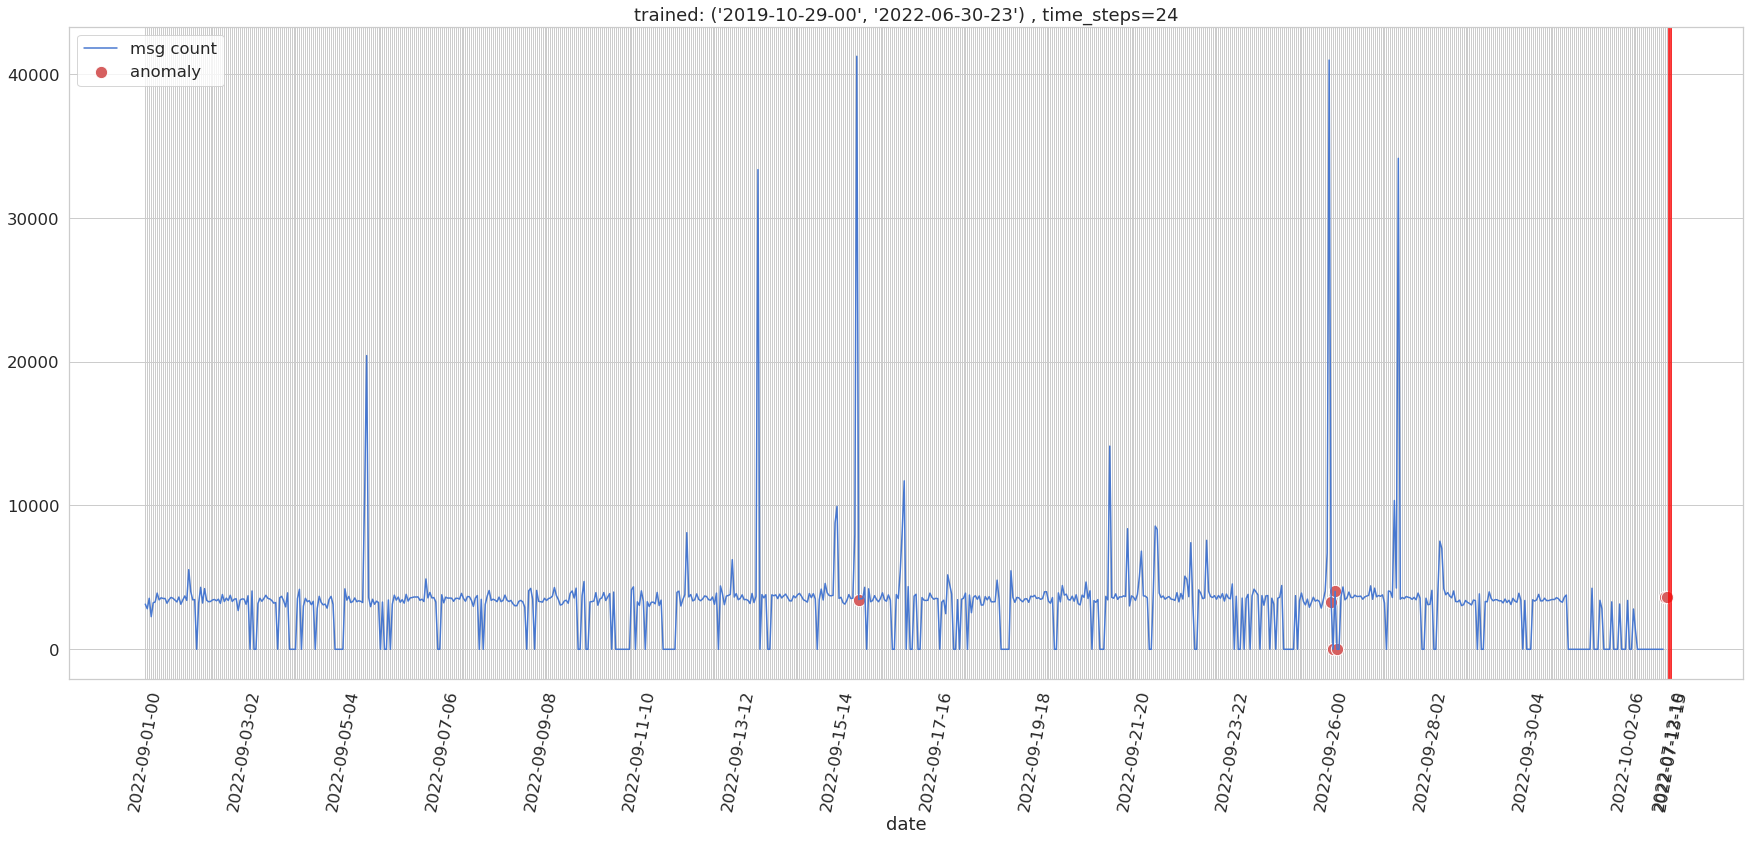

In [336]:
filtered_plot_enc2(anomalyEncC5,date_from='2022-09-01-00', date_to='2022-10-03-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEncC6)) + ' , time_steps=24')

In [ ]:
contains='2022-07'
_df2 = anomalyEnc6.anomalies
#_df2[_df2.index.str.contains('2022-07-')]
#len(_df2)
_df2[_df2.index.str.contains(contains)]

In [ ]:
anomalyEnc6.test.loc['2022-10-06-14'].index
_from_index = anomalyEnc6.test.index.get_loc('2022-07-01-00')
_to_index = anomalyEnc6.test.index.get_loc('2022-07-15-00')

#anomalyEnc6.test.iloc[_index]
_from_index,_to_index

In [ ]:
#anomalyEnc6.test.iloc[anomalyEnc6.test.index[_from_index:_to_index + 1]]

#anomalyEnc6.test.iloc[_from_index:_to_index + 1]
for date in anomalyEnc6.anomalies.index:
    if date >= '2022-07-01-00':
        _min = anomalyEnc6.anomalies.index.get_loc(date)
        break     
for _max in range(_min,len(anomalyEnc6.anomalies.index)):
    if anomalyEnc6.anomalies.index[_max] > '2022-07-07-23':
        break
        
_min,_max        

In [ ]:
anomalyEnc6.anomalies.index

In [ ]:
'2022-07-01-00' > '2022-07-07-23'

### Beispiel Anomalie / messages sent / pda hour

In [ ]:
#filtered_plot_enc(anomalyEnc6,'2022-07-0','titlestring','xlabel',skip=100,rotate=80)
filtered_plot_enc(anomalyEnc6,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80)

In [ ]:
filtered_plot_enc(anomalyEnc4,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80)

In [ ]:
anomalyEnc2.anomalies

In [ ]:
filtered_plot(anomalyEnc2.test,anomalyEnc2.scaler,anomalyEnc2.anomalies,anomalyEnc2.TIME_STEPS,'2022-02-','titlestring','xlabel',5,80)   
#filtered_plot_enc(anomalyEnc2,'2022-02-','titlestring','xlabel',5,80) 

#get_period(anomalyEnc2.anomalies)
anomalyEnc2.anomalies.index[0].split('-')


print(get_index_period(anomalyEnc2.anomalies))

In [ ]:
_df2 = anomalyEnc.test[anomalyEnc.TIME_STEPS:]
_df2 = _df2[_df2.index.str.contains('2022-02-')]

fig = plt.figure(figsize=(18,9))

plt.plot(
  _df2.index, 
  #scaler.inverse_transform(test[TIME_STEPS:].close), 
  anomalyEnc.scaler.inverse_transform(_df2),   
  label='msg count'
);

ax = scatterplot(anomalyEnc.anomalies.index, _a, 'anomaly') 

label(ax,5,80)

In [ ]:
_a=anomalyEnc.anomalies['close']
_a = pd.DataFrame(_a)
_a = anomalyEnc.scaler.inverse_transform(_a)
_a = _a[:, 0]
_a

In [ ]:
anomalyEnc.scaler.inverse_transform(anomalyEnc.test[anomalyEnc.TIME_STEPS:])

In [ ]:
anomalyEnc.test[anomalyEnc.TIME_STEPS:].index

In [ ]:
ax = scatterplot(anomalyEnc.anomalies.index, _a, 'anomaly') 

In [ ]:
#anomalyEnc = anomalyEnc2
#plot_test(anomalyEnc2.test,anomalyEnc2.scaler,anomalyEnc2.anomalies,'titlestring', '_xlabel')

filtered_plot(anomalyEnc2.test,anomalyEnc2.scaler,anomalyEnc2.anomalies,anomalyEnc2.TIME_STEPS,'2022-07-1','titlestring','xlabel',70,80) 

In [ ]:
CSENDERENDPOINTID=0
CRECEIVERENDPOINTID=0

In [ ]:
out3 = widgets.Output()

def models_on_change(change):
    global anomalyEnc
    if change['type'] == 'change' and change['name'] == 'value':
        #print(change['new'])
        if change['new'] == 1:
            anomalyEnc = anomalyEnc1
        else:
            anomalyEnc = anomalyEnc2

def draw_graphs():
    with out3:
        clear_output()
        sender = 0
        #titlestring ="endpoint (sending) : " + str(sender) + " ( trained: " +  anomalyEnc.train.index[0] + " -- " + anomalyEnc.train.index[len(anomalyEnc.train.index)-1] + " )"
        #plot_test(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,titlestring)
        
        #fig = plt.figure(figsize=(12,6))
        #plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
        
        # threshold
        #plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.loss, label='loss')
        #plt.plot(anomalyEnc.test_score_df.index, anomalyEnc.test_score_df.threshold, label='threshold')
        
        sender = CSENDERENDPOINTID
        receiver = CRECEIVERENDPOINTID
        titlestring ="endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID) + " ( trained: " +  anomalyEnc.train.index[0] + " -- " + anomalyEnc.train.index[len(anomalyEnc.train.index)-1] + " )"
        _xlabel = 'date: ' + anomalyEnc.test.index[0] + ' -- ' + anomalyEnc.test.index[len(anomalyEnc.test) -1]
        plot_test(anomalyEnc.test,anomalyEnc.scaler,anomalyEnc.anomalies,titlestring, _xlabel)
        display(anomalyEnc.anomalies)
        
        #plt.show(fig)
         
def evaluateAnomalies(threshold_X):
    with out2:
        anomalyEnc.evaluateAnomalies(threshold_X)
        clear_output()
            
            
def on_value_submit_threshold(change):   
    threshold.disabled=True 
    with out3:
        clear_output()
    evaluateAnomalies(float(threshold.value))
    #draw_graphs()
    with out3:
        clear_output()
        display(anomalyEnc.anomalies)
    threshold.disabled=False                
            
def on_value_submit_percent(change):
    global threshold_X
    percent.disabled=True  
    #threshold.disabled=True 
    threshold_X = getThreshold(float(percent.value))
    threshold.value = str(threshold_X)
    percent.disabled=False  
    
percent   = widgets.Text(description = 'percent',value = '0.985', style=style, layout=layout,disabled=False)    
percent.on_submit(on_value_submit_percent)

threshold   = widgets.Text(description = 'threshold',value = '1.0', style=style, layout=layout,disabled=False)    
threshold.on_submit(on_value_submit_threshold)

models = widgets.Dropdown(description='model',options =[1,2], style=style, layout=layout,disabled=False)
models.observe(models_on_change) 

anomalyEnc = anomalyEnc1
display(models,percent,threshold,out3)

### evaluate anomalies

In [9]:
def get_anomalies(anomalyEnc,threshold):
    anomalyEnc.evaluateAnomalies(threshold)
    return anomalyEnc.anomalies

In [451]:
#getThreshold(1.0,anomalyEncC6)
get_anomalies(anomalyEncC6,4)

,loss,close,threshold,anomaly
date,,,,
2022-07-07-09,4.22798,-0.032548,4,True


In [13]:
_threshold = getThreshold(1.0,anomalyEnc)

In [142]:
_anomalies = get_anomalies(anomalyEnc,_threshold * 0.43)
_anomalies

,loss,outcome,threshold,anomaly
50,1.269587,1.656705,0.645,True
51,1.182538,1.669505,0.645,True
52,1.098275,1.652439,0.645,True
53,1.006098,1.635373,0.645,True
54,0.924442,1.622573,0.645,True
...,...,...,...,...
4995,0.822603,0.325561,0.645,True
4996,0.830511,0.291429,0.645,True
4997,0.857431,0.257297,0.645,True
4998,0.875348,0.214632,0.645,True


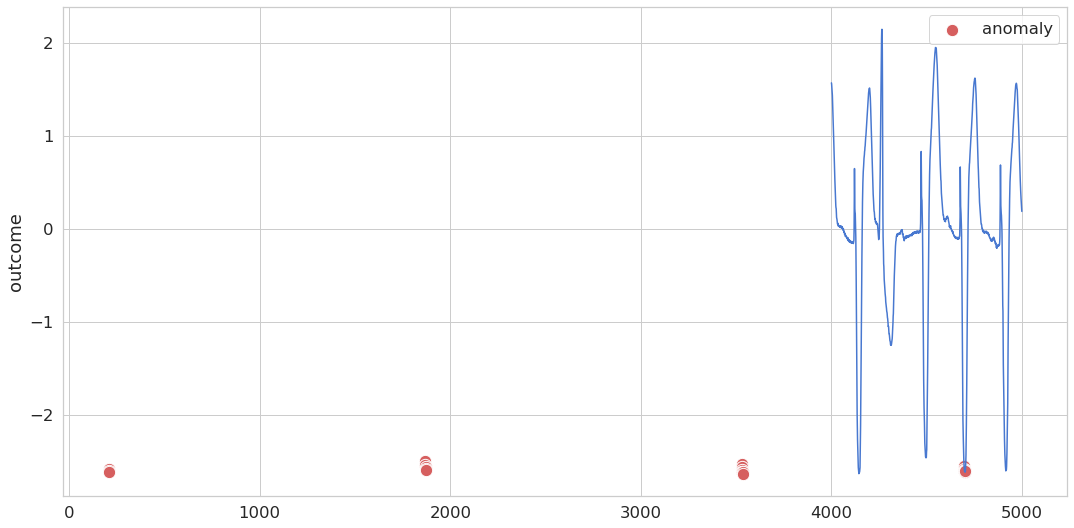

In [218]:
anomalyEnc.test
_anomalies = anomalyEnc.anomalies
_threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]
_test = anomalyEnc.test[4000:5000]
fig = plt.figure(figsize=(18,9))
plt.plot(_test.index, _test['outcome'])    
ax = scatterplot(_anomalies.index, _anomalies['outcome'], 'anomaly') 

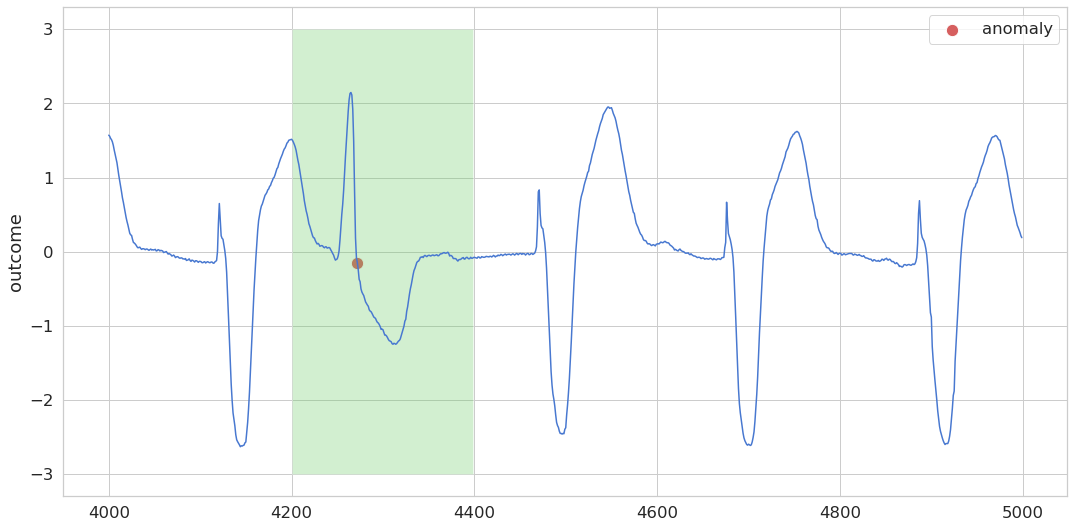

In [238]:
plot_anomalies(anomalyEnc,test=anomalyEnc.test[4000:],expect=(4200,4400))

### plot_anomalies

In [397]:
def plot_anomalies(anomalyEnc,test=None, expect=None, column_y='outcome',contains=None, date_from=None, date_to=None):
    _anomalies = anomalyEnc.anomalies
    _threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]
    if test is None:
        _test = anomalyEnc.test
    else:
        _test = test
        
    if contains is not None:
        _test = _test[_test.index.str.contains(contains)]
        #anomalies = anomalies[anomalies.index.str.contains(contains)]
    elif date_from is not None and date_to is not None:
        _from_index = _test.index.get_loc(date_from)
        _to_index   = _test.index.get_loc(date_to)
        #_df2 = _df2[_df2.index[_from_index:_to_index + 1]]
        _test = _test.iloc[_from_index:_to_index + 1]
       
    else:
        pass    
        
        
    fig = plt.figure(figsize=(18,9))
    #plt.plot(_test.index, _test[column_y])       
    plt.plot(
      _test.index,  
      anomalyEnc.scaler.inverse_transform( _test),   
      label='msg count'
    );

    _a = inverse_transform_anomalies(scaler=scaler,anomalies=_anomalies, column_y='close')
    ax = scatterplot(_anomalies.index, _a, 'anomaly') 
    
    #ax = scatterplot(_anomalies.index, _anomalies[column_y], 'anomaly') 
    
    ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    plt.xticks(rotation=80,ticks=ticks)
    
    if expect is not None:
        #print(_test.index.get_loc(expect[0]),_test.index.get_loc(expect[1]))
        e1=_test.index.get_loc(expect[0])
        e2=_test.index.get_loc(expect[1])
        x = np.arange(e1,e2)
        #x = np.arange(expect[0],expect[1])
        _max = np.max(anomalyEnc.scaler.inverse_transform( _test))
        y1 = [0]*len(x)
        y2 = [_max]*len(x)
        plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
    plt.show()

In [72]:
_threshold2 = getThreshold(1.0,anomalyEnc2)

In [221]:
_threshold = getThreshold(1.0,anomalyEnc)
_threshold

3.372658809234499

In [111]:
#_anomalies = get_anomalies(anomalyEnc2,0.65)
_anomalies = get_anomalies(anomalyEnc2,_threshold2 * 0.9)
#_anomalies

In [223]:
_threshold
get_anomalies(anomalyEnc,3.3)

,loss,outcome,threshold,anomaly
4272,3.372659,-0.14802,3.3,True


In [131]:
_threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]
_threshold

1.4502432879708345

### plot_error

In [282]:
def plt_add_anomaly(_df2):
    hours= False
    if len(_df2.index[0].split('-')) == 4:
        hours = True
    if hours == False:
        plt.axvline(x='2022-07-12', color="red")
        #plt.axvline(x='2022-07-13', color="red")
        #plt.axvline(x='2022-09-13', color="red")
    else:    
        plt.axvline(x='2022-07-12-10', color="red")
        plt.axvline(x='2022-07-13-15', color="red")
        #plt.axvline(x='2022-09-13-19', color="red")
        #plt.axvline(x='2022-09-13-20', color="red")

def plot_error(anomalyEnc):
    fig = plt.figure(figsize=(18,9))
    #_test = anomalyEnc.test_score_df.iloc[2050:]
    _test = anomalyEnc.test_score_df
    _threshold= pd.unique(anomalyEnc.anomalies['threshold'])[0]

    
    
    plt.plot(_test.index, _test['loss'])   
    plt.axhline(y=_threshold, color="red") 
    
    ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    plt.xticks(rotation=80,ticks=ticks)
    
    plt_add_anomaly(_test)
    
    plt.show(fig)

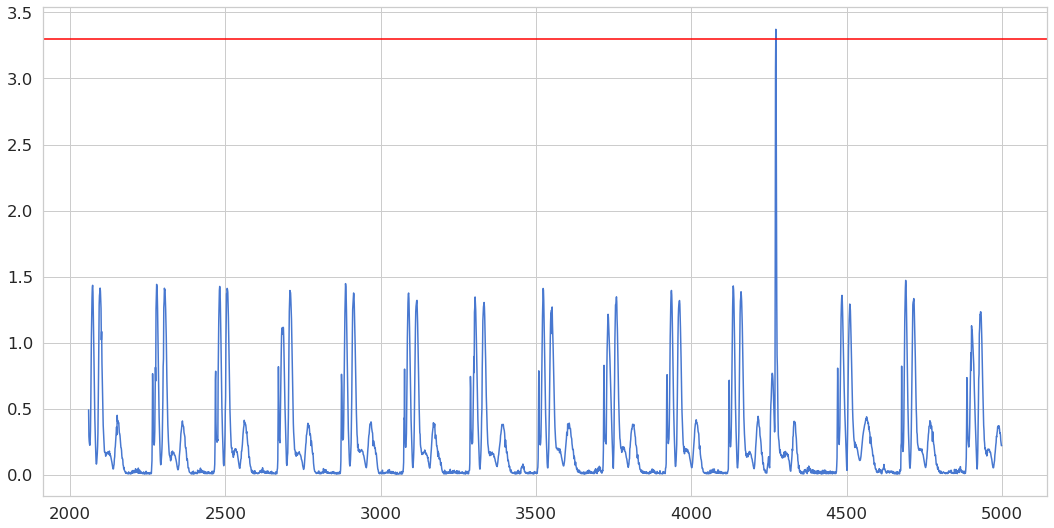

In [226]:
plot_error(anomalyEnc)

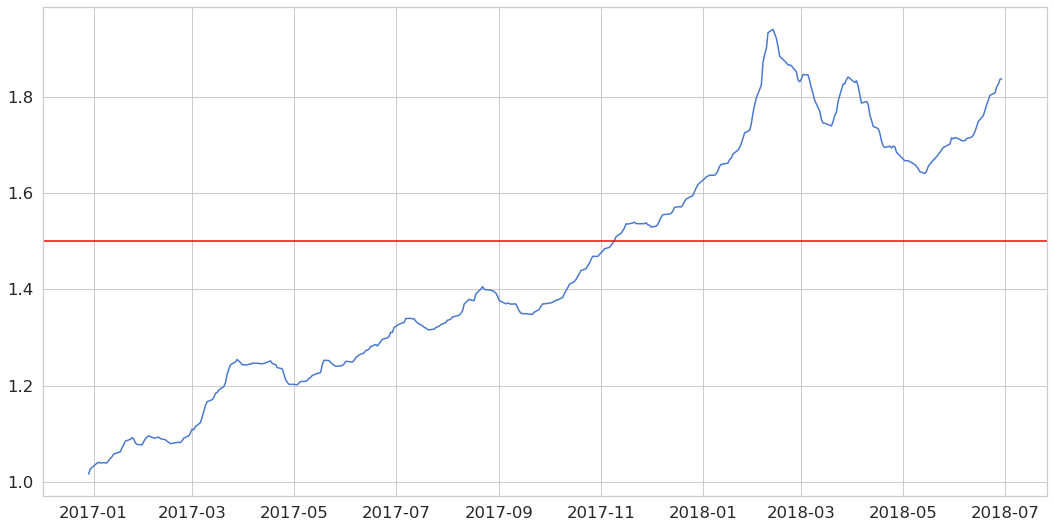

In [227]:
plot_error(anomalyEnc2)

### C6

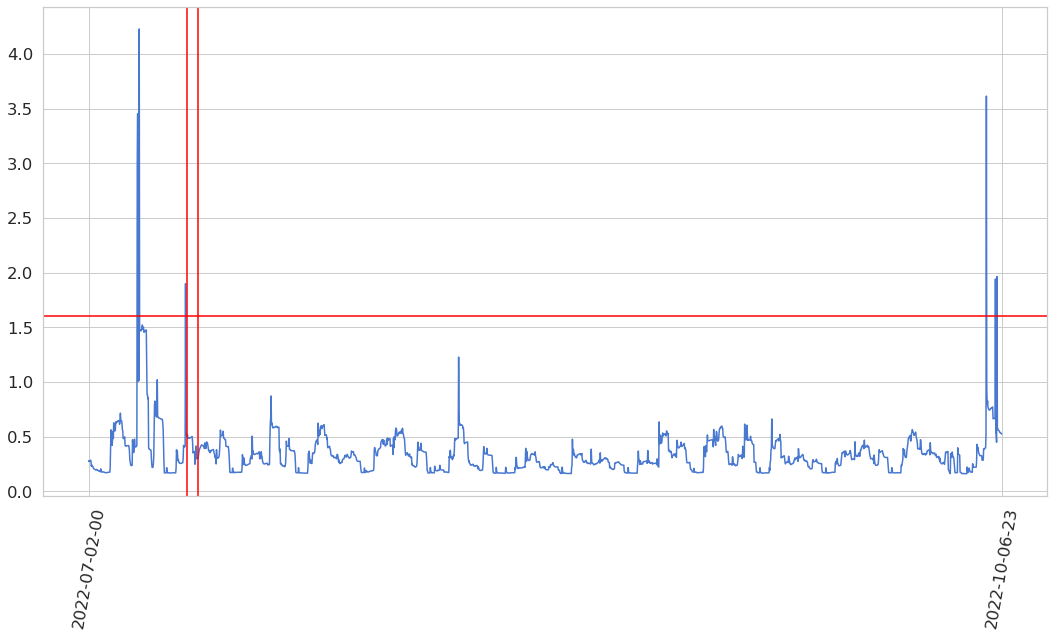

In [285]:
plot_error(anomalyEncC6)
#anomalyEncC1.anomalies

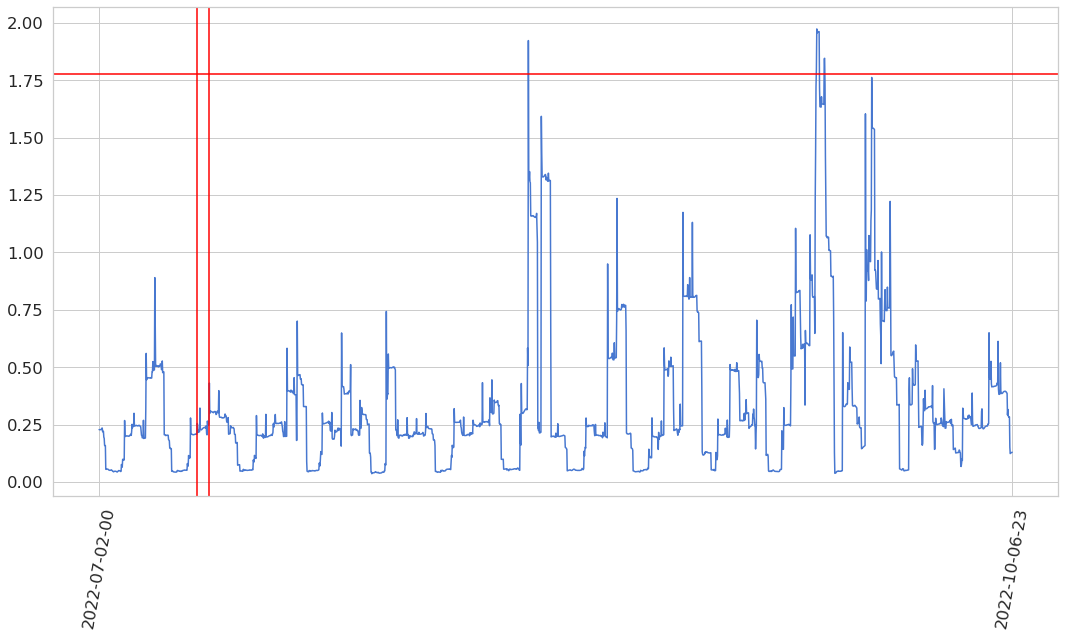

In [483]:
plot_error(anomalyEncB6)

In [482]:
#_threshold = getThreshold(1.0,anomalyEncB6)
get_anomalies(anomalyEncB6,0.9 * _threshold)

#plot_anomalies(anomalyEncB6,column_y='close',test=anomalyEncB6.test, expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')
#anomalyEncB6.test.loc['2022-07-12-10']
#anomalyEncB6.test.index[anomalyEncB6.test.index.str.contains('2022-07-12')]
#_pda_hour.index[_pda_hour.index.str.contains('2022-07-12')]

,loss,close,threshold,anomaly
date,,,,
2022-08-16-14,1.922601,0.008560,1.775948,True
2022-09-16-04,1.797678,3.952818,1.775948,True
2022-09-16-05,1.973275,-0.232608,1.775948,True
2022-09-16-06,1.956281,-0.038118,1.775948,True
2022-09-16-07,1.957981,-0.147032,1.775948,True
2022-09-16-08,1.960504,-0.123693,1.775948,True
2022-09-16-09,1.961548,-0.139253,1.775948,True
2022-09-16-10,1.961676,-0.201489,1.775948,True
2022-09-16-11,1.961403,1.191059,1.775948,True


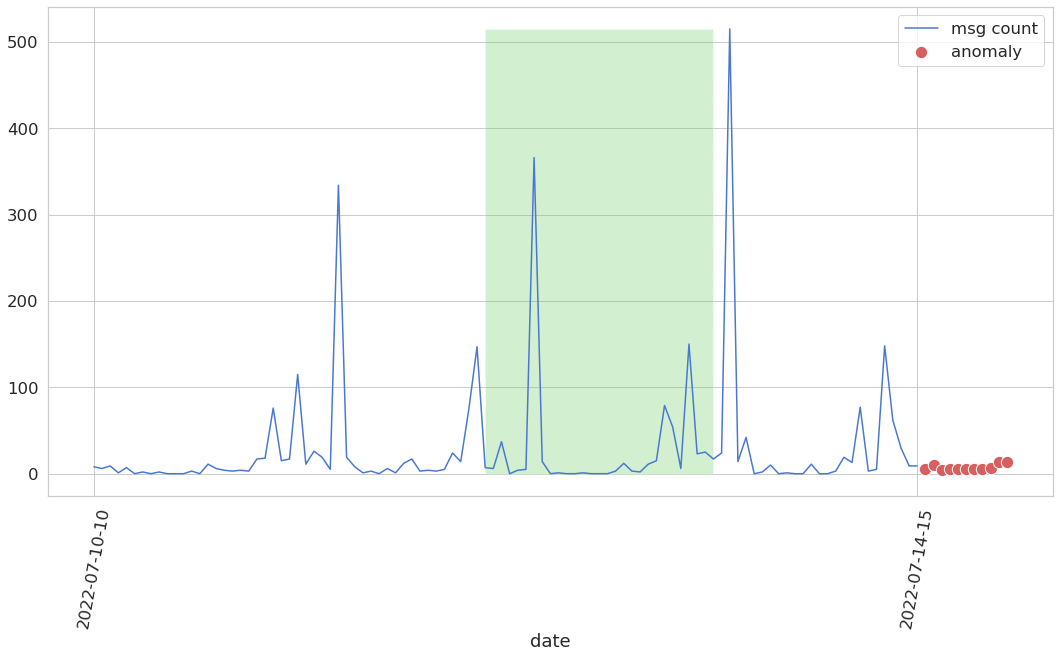

In [484]:
plot_anomalies(anomalyEncB6,column_y='close',test=anomalyEncB6.test[100:400], expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')

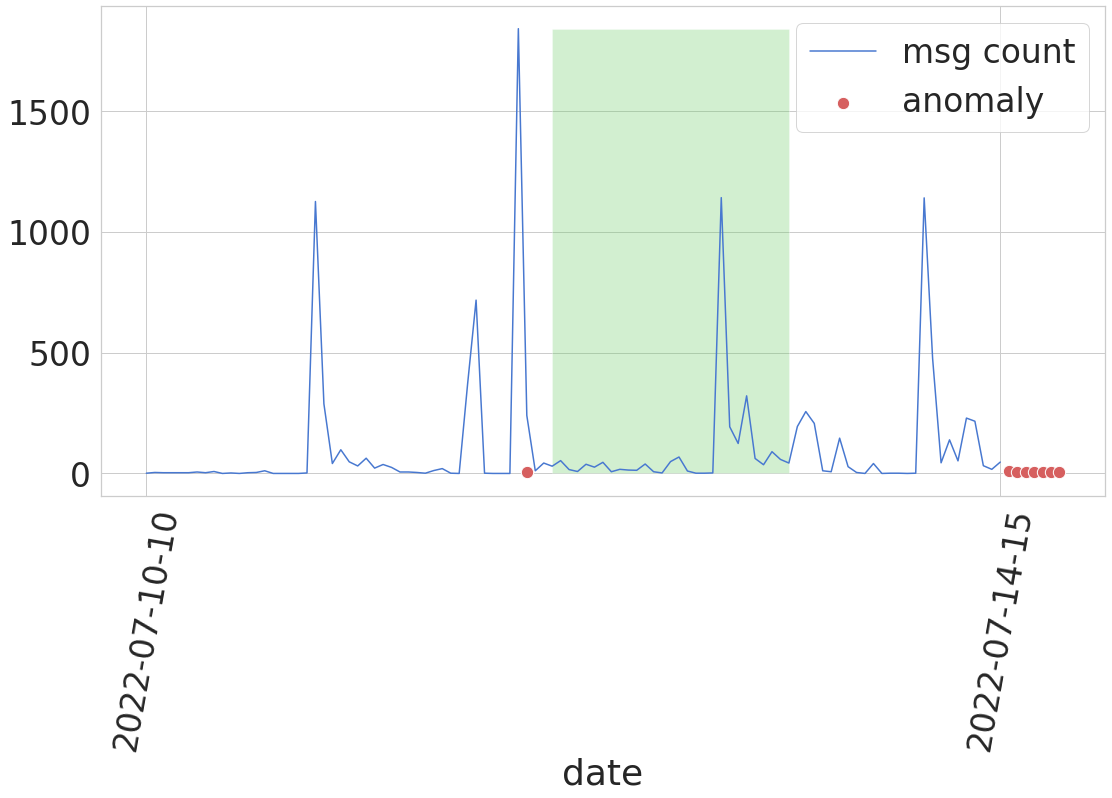

In [402]:
plot_anomalies(anomalyEncC6,column_y='close',test=anomalyEncC6.test[100:400], expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')

#anomalyEnc.scaler.inverse_transform(anomalyEncC6.test)

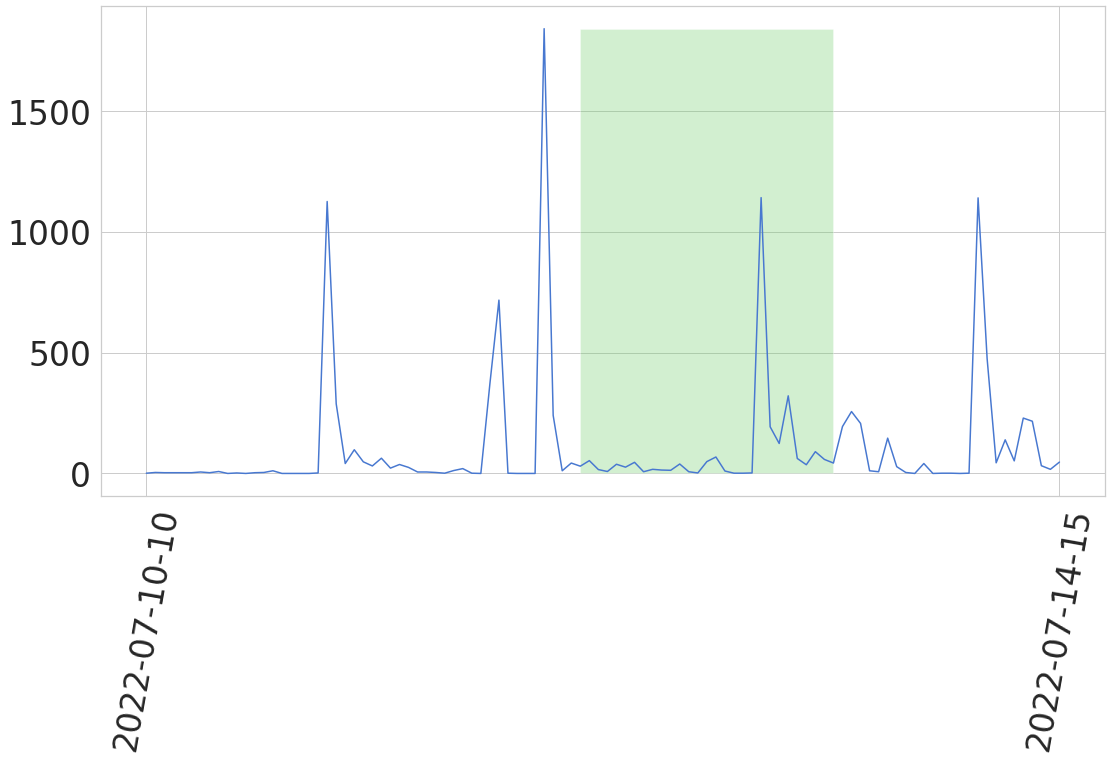

In [412]:
#plot_graph2(test=anomalyEncC6.test, column_y='close', expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')
plot_graph2(test=pda_hour, column_y='outcome', expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')

In [446]:
_df = sparkSession.read.parquet('/tmp/' + sf.iloc[len(sf)-10].file)
_pfall = _df.toPandas()

In [442]:
_pfall = _pfall[(_pfall['year']==2022) & ((_pfall['month']==7) | (_pfall['month']==6))].reset_index()

In [447]:
_pda_hour = createData_ymdh(_pfall,0)
check(_pda_hour)
replace_index_by_date_column(_pda_hour)
_pda_hour = _pda_hour.sort_index()

In [444]:
_pda_hour.loc['2022-07-14-15'], pda_hour.loc['2022-07-14-15']

(date       2022-07-14-15
 year                2022
 month                  7
 day                   14
 hour                  15
 outcome                9
 Name: 2022-07-14-15, dtype: object,
 index              17033
 date       2022-07-14-15
 year                2022
 month                  7
 day                   14
 hour                  15
 outcome               47
 Name: 2022-07-14-15, dtype: object)

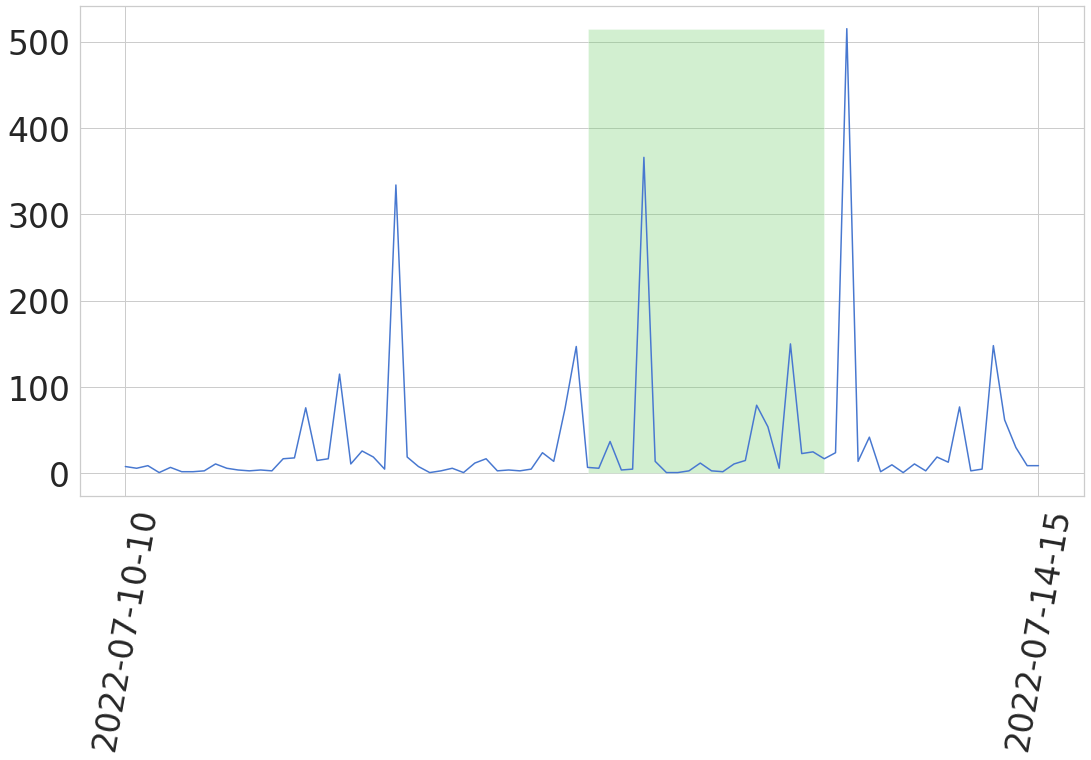

In [445]:
#_pda_hour[(_pda_hour['month']==7)  & (_pda_hour['day']==12)]
plot_graph2(test=_pda_hour, column_y='outcome', expect=('2022-07-12-10','2022-07-13-15'),date_from='2022-07-10-10', date_to='2022-07-14-15')
#_pda_hour.index.get_loc('2022-07-12-10')

In [394]:
def createBarplot(md=None,fx=24,fy=12,fontscale=3.0,title="",expect=None) :
    sns.set(style='whitegrid', palette='muted', font_scale=fontscale)
    plt.figure(figsize=(fx,fy))
    plt.title(title)
    ax = sns.barplot(x=md.index, y=md['close'], data=md)
    #ax = sns.barplot(x=md['date'], y=md['outcome'], data=md)
    #plt.setp( ax.xaxis.get_majorticklabels(), rotation=75 )
    _test=md
    #ticks = (_test.index[0], _test.index[len(_test.index) - 1])
    #plt.xticks(range(0,len(ticks)), ticks, rotation=80)
    label(ax,20,80)
    
    #plt.xticks(range(0,len(_test.index)), _test.index)
    #plt.xticks(rotation=80,ticks=ticks)
    plt.tight_layout()
    
    if expect is not None:
        #print(_test.index.get_loc(expect[0]),_test.index.get_loc(expect[1]))
        e1=_test.index.get_loc(expect[0])
        e2=_test.index.get_loc(expect[1])
        x = np.arange(e1,e2)
        #x = np.arange(expect[0],expect[1])
        _max = np.max(anomalyEnc.scaler.inverse_transform( _test))
        y1 = [0]*len(x)
        y2 = [_max]*len(x)
        plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
    
    plt.show()
    return ax

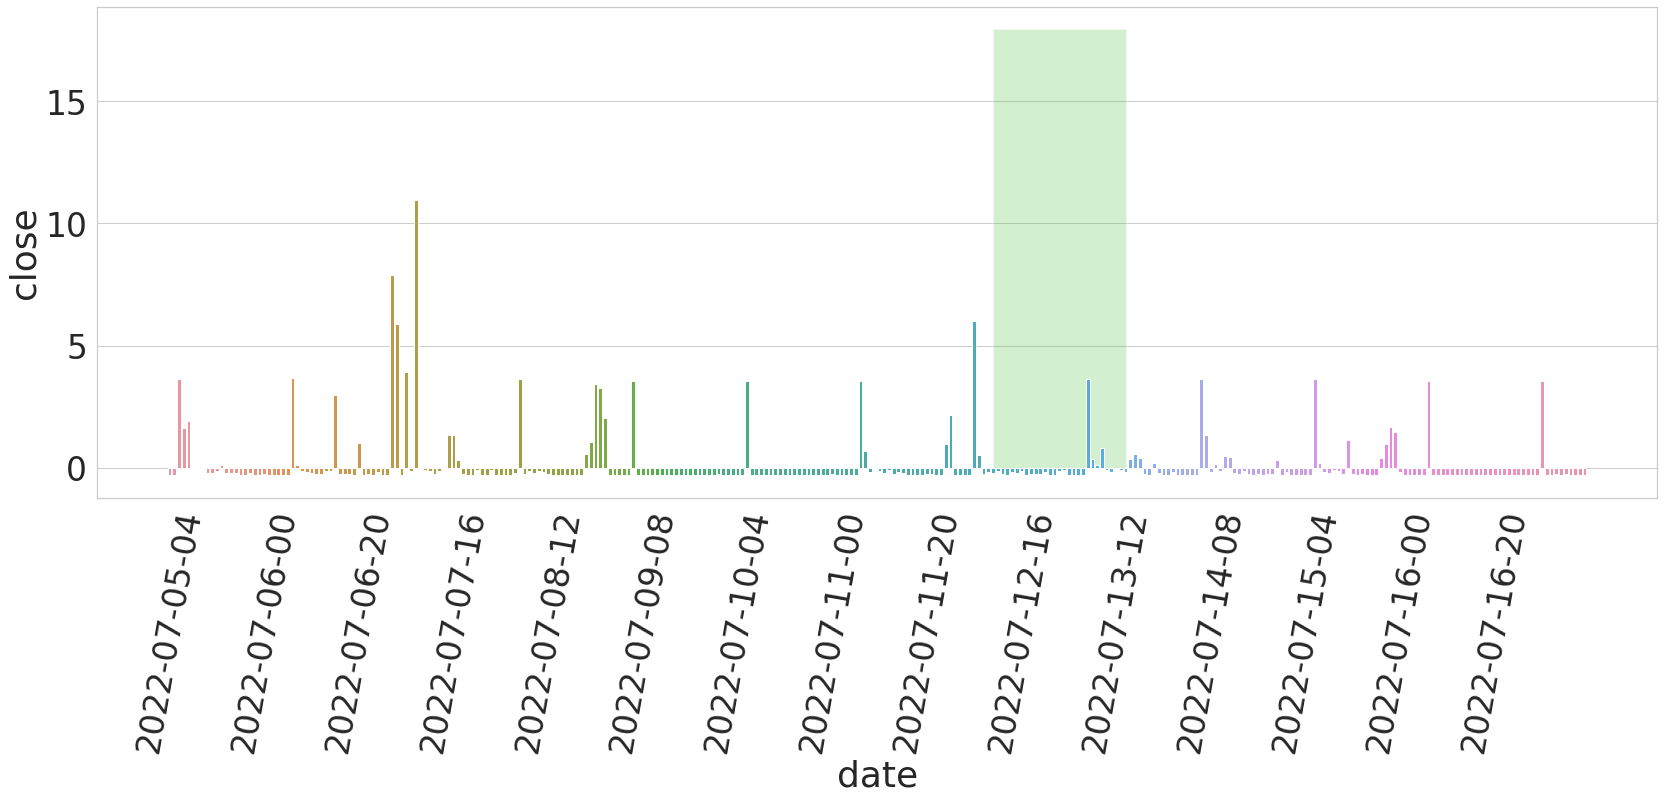

<AxesSubplot:xlabel='date', ylabel='close'>

In [395]:
#anomalyEncC6.test[100:400].index
createBarplot(anomalyEncC6.test[100:400],24,12,3.0,expect=('2022-07-12-10','2022-07-13-15'))

In [ ]:
_numsenders = str(len(senders))
md = createData_ym(pfall0,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by endpoint "  + str(pd.unique(pfall0['CSENDERENDPOINTID'])[0]) + ' (' + _numsenders + ' sending endpoints)' )

In [360]:
inverse_transform_anomalies(scaler=anomalyEncC6.scaler,anomalies=anomalyEncC6.anomalies)

array([1796.,    4.,   46.,   80.,  240.,  672.,    8.,   89.])

In [329]:
anomalyEncC6.test.loc['2022-07-12-06']

close    6.02223
Name: 2022-07-12-06, dtype: float64

In [326]:
pda_hour[(pda_hour['year'] == 2022) & (pda_hour['month'] == 7) & (pda_hour['day'] == 12)] 

,index,date,year,month,day,hour,outcome
date,,,,,,,
2022-07-12-00,16976,2022-07-12-00,2022,7,12,0,371
2022-07-12-01,16977,2022-07-12-01,2022,7,12,1,717
2022-07-12-02,16978,2022-07-12-02,2022,7,12,2,1
2022-07-12-03,25332,2022-07-12-03,2022,7,12,3,0
2022-07-12-04,25333,2022-07-12-04,2022,7,12,4,0
2022-07-12-05,25334,2022-07-12-05,2022,7,12,5,0
2022-07-12-06,16979,2022-07-12-06,2022,7,12,6,1840
2022-07-12-07,16980,2022-07-12-07,2022,7,12,7,240
2022-07-12-08,16981,2022-07-12-08,2022,7,12,8,11


In [327]:
anomalyEncC6.test[:400]

,close
date,
2022-07-01-00,-0.225200
2022-07-01-01,-0.290565
2022-07-01-02,-0.294005
2022-07-01-03,-0.290565
2022-07-01-04,-0.287124
...,...
2022-07-17-11,-0.259603
2022-07-17-12,-0.273363
2022-07-17-13,-0.273363


In [284]:
get_anomalies(anomalyEncC6,1.6)

,loss,close,threshold,anomaly
date,,,,
2022-07-07-04,2.967311,5.870860,1.6,True
2022-07-07-05,3.451771,-0.294005,1.6,True
2022-07-07-07,2.707665,-0.149516,1.6,True
2022-07-07-09,4.227980,-0.032548,1.6,True
2022-07-12-07,1.898033,0.517886,1.6,True
2022-10-05-08,3.613750,2.004059,1.6,True
2022-10-06-07,1.940805,-0.280244,1.6,True
2022-10-06-11,1.962899,-0.001586,1.6,True


In [116]:
pd.unique(anomalyEnc2.anomalies['threshold'])[0]

1.7464260889722916

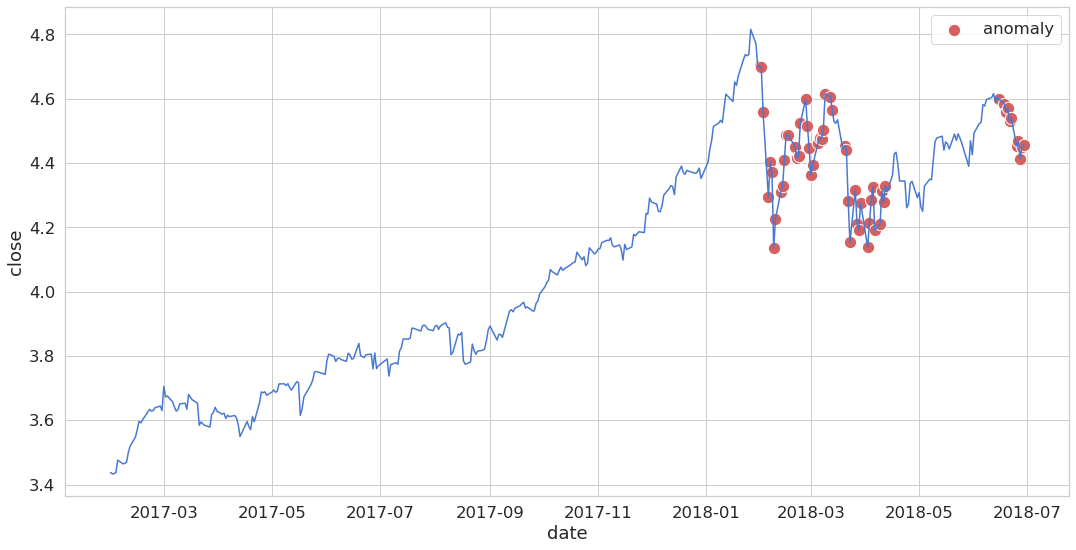

In [98]:
anomalyEnc.test

fig = plt.figure(figsize=(18,9))
_test = anomalyEnc2.test.iloc[2100:]
plt.plot(_test.index, _test['close'])    
ax = scatterplot(_anomalies.index, _anomalies['close'], 'anomaly') 

In [22]:
_a = _anomalies['outcome']
_a = pd.DataFrame(_a)
_a = scaler.inverse_transform(_a)
_a = _a[:, 0]
_a

array([5.03507518, 4.95502728])

In [251]:
_thresholdC1 = getThreshold(1.0,anomalyEncC1)
_thresholdC2 = getThreshold(1.0,anomalyEncC2)
_thresholdC3 = getThreshold(1.0,anomalyEncC3)
_thresholdC4 = getThreshold(1.0,anomalyEncC4)
_thresholdC5 = getThreshold(1.0,anomalyEncC5)
_thresholdC6 = getThreshold(1.0,anomalyEncC6)

In [252]:
get_anomalies(anomalyEncC1,_thresholdC1 * 0.8)
get_anomalies(anomalyEncC2,_thresholdC2 * 0.8)
get_anomalies(anomalyEncC3,_thresholdC3 * 0.8)
get_anomalies(anomalyEncC4,_thresholdC4 * 0.8)
get_anomalies(anomalyEncC5,_thresholdC5 * 0.8)
get_anomalies(anomalyEncC6,_thresholdC6 * 0.8)

,loss,close,threshold,anomaly
date,,,,
2022-07-07-05,3.451771,-0.294005,3.382384,True
2022-07-07-09,4.227980,-0.032548,3.382384,True
2022-10-05-08,3.613750,2.004059,3.382384,True


In [ ]:
_threshold7 = getThreshold(1.0,anomalyEnc7)

In [ ]:
get_anomalies(anomalyEnc7,_threshold7 * 0.6)

In [ ]:
get_anomalies(anomalyEnc3,_threshold3 * 0.8)

In [ ]:
anomalyEnc4.anomalies

In [ ]:
get_anomalies(anomalyEnc4,_threshold4 * 0.7)
filtered_plot_enc(anomalyEnc4,'2022-07-','titlestring','xlabel',100,80)

In [ ]:
filtered_plot_enc(anomalyEnc6,'2022-07-','titlestring','xlabel',100,80)

In [ ]:
_threshold3 = getThreshold(1.0,anomalyEnc3)

In [ ]:
get_anomalies(anomalyEnc3,_threshold3 * 0.9)

In [ ]:
filtered_plot(anomalyEnc3.test,anomalyEnc3.scaler,anomalyEnc3.anomalies,anomalyEnc3.TIME_STEPS,'2022-07-1','titlestring','xlabel',70,80) 

In [ ]:
def plot_test(anomalyEnc,anomalies,titlestring,xlabel):

    fig = plt.figure(figsize=(18,9))
    
    _a=anomalies['close']
    _a = pd.DataFrame(_a)
    _a = anomalyEnc.scaler.inverse_transform(_a)
    _a = _a[:, 0]
    #print(_a,type(_a),_a[0],len(_a),len(_a[:, 0]))
    ax = scatterplot(anomalies.index, _a, 'anomaly') 
    
    ax.set_xlabel(xlabel)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    plt.xticks(rotation=25)
    plt.legend();

    label(ax,5,80)
    plt.title(titlestring)
    plt.show(fig)


In [ ]:
anomalies = get_anomalies(anomalyEnc3,_threshold3 * 0.9)
plot_test(anomalyEnc3, anomalies, '','')

In [ ]:
anomalies.index

In [ ]:
filtered_plot(anomalyEnc3.test,anomalyEnc3.scaler,anomalyEnc3.anomalies,anomalyEnc3.TIME_STEPS,'2022-07-1','titlestring','xlabel') 

In [ ]:
def plot_test1(anomalies,test,scaler,titlestring,xlabel):

    fig = plt.figure(figsize=(18,9))
    
    plt.plot(
      #test[anomalyEnc.TIME_STEPS:].index, 
      test.index,  
      #scaler.inverse_transform(test[TIME_STEPS:].close), 
      #scaler.inverse_transform(test[anomalyEnc.TIME_STEPS:]),  
      scaler.inverse_transform(test),  
      label='msg count'
    );

    
    _a=anomalies['close']
    _a = pd.DataFrame(_a)
    _a = anomalyEnc.scaler.inverse_transform(_a)
    _a = _a[:, 0]
    #print(_a,type(_a),_a[0],len(_a),len(_a[:, 0]))
    ax = scatterplot(anomalies.index, _a, 'anomaly') 
    
    
    #ax.set_xlabel(xlabel)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    plt.xticks(rotation=25)
    plt.legend();

    #label(ax,5,80)
    plt.title(titlestring)
    plt.show(fig)


In [ ]:
_df = anomalyEnc3.test
_df = _df[_df.index.str.contains('2022-07-1')]
plot_test1(anomalies,_df,anomalyEnc3.scaler,'','')

In [ ]:
_df

In [ ]:

listi = list(anomalyEnc3.test.index)
sub = '2022-07-1'

print ("\n".join(s for s in listi if sub in s))

In [ ]:
anomalyEnc3.test

In [ ]:
get_anomalies(anomalyEnc1,_threshold1 * 0.9)

In [ ]:
listi = list(anomalyEnc2.anomalies.index)
sub = '2022-07-1'

print ("\n".join(s for s in listi if sub in s))

In [ ]:
#getThreshold(0.9),getThreshold(0.8),getThreshold(0.7),getThreshold(0.6),getThreshold(0.5)
_thresholds=(5.723571592241854,5.151214433017669,4.578857273793484,4.006500114569298,3.4341429553451124,2.861785796120927)
#getThreshold(1.0)

In [ ]:
_thresholds[0] - _thresholds[1], _thresholds[2] - _thresholds[3]

In [ ]:
percent.disabled=False

In [ ]:
xs=list(anomalyEnc.anomalies.index)
[s for s in xs if "2022" in s]

# Demo

In [ ]:
pfall0

In [ ]:
CSENDERENDPOINTID=0
CRECEIVERENDPOINTID=0
print(TimeRange(dataframe=pfall).__dict__)
md = createData_ym(pfall0,0)
ax=createBarplot(md,24,12,3.0,title="number messages " +  "endpoint " + str(CSENDERENDPOINTID) + ' --> ' + str(CRECEIVERENDPOINTID))

In [ ]:
display (year_hbox,month_hbox,out)

In [ ]:
percent   = widgets.Text(description = 'percent',value = '0.985', style=style, layout=layout,disabled=False)    
percent.on_submit(on_value_submit_percent)

models = widgets.Dropdown(description='model',options =[1,2], style=style, layout=layout,disabled=False)
models.observe(models_on_change) 

anomalyEnc = anomalyEnc1
display(models,percent,threshold,out3)

In [ ]:
len(anomalyEnc.anomalies)

In [ ]:
'2022-10-02-14' in anomalyEnc.anomalies.index

listi = list(anomalyEnc2.anomalies.index)
sub = '2022-07-1'

print ("\n".join(s for s in listi if sub in s))

# Demo 2

## Messagetracking der Service-Cloud

In [ ]:
pfall0

In [ ]:
_numsenders = str(len(senders))
md = createData_ym(pfall0,0)
ax=createBarplot(md,24,12,3.0,title="number messages sent by endpoint "  + str(pd.unique(pfall0['CSENDERENDPOINTID'])[0]) + ' (' + _numsenders + ' sending endpoints)' )

### Problembeschreibungen / Erwartungsmonitoring

- am 12.07.2022 wurde ein BIS Release installiert dass zur Verzögerung vieler Nachrichten geführt hat.
Die letzten Nachrichten wurden am Folgetag um ca. 15:00 Uhr CET verarbeitet.
Es sollten also deutliche Anomalien zwischen 12.07.2022 (10:00 Uhr) bis 13.07.2022 (15:00 Uhr) zu sehen sein.


- 13.09.2022 19:00 Uhr / 20:00 Uhr UTC: Massive Last, Anflutung des Systems, vor allem im zweiten Intervall.
Durchlaufzeiten waren deutlich erhöht. 


### Anomalieerkennung und Erwartungsmonitoring (messages sent / hour)

In [ ]:
#anomalyEnc6 = train_model(dataframe=pda_hour, time_steps=24, year=2022,month=6)
filtered_plot_enc(anomalyEnc6,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24')

### Anomalieerkennung und Erwartungsmonitoring (Durchlaufszeit)

In [ ]:
filtered_plot_enc2(anomalyEnc5,date_from='2022-07-01-00', date_to='2022-07-15-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24', ylabel='CMESSAGETAT2')

In [ ]:
anomalyEnc5.test.index.get_loc( '2022-09-01-00')

In [ ]:
_num_anomalies = len(get_anomalies(anomalyEnc5,_threshold5 * 0.8))
filtered_plot_enc2(anomalyEnc5,date_from='2022-09-15-00', date_to='2022-10-04-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24' + ', #anomalies: ' + str(_num_anomalies), ylabel='CMESSAGETAT2',annotations=False)

In [ ]:
_num_anomalies = len(get_anomalies(anomalyEnc5,_threshold5 * 0.77))
filtered_plot_enc2(anomalyEnc5,date_from='2022-09-15-00', date_to='2022-10-04-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24' + ', #anomalies: ' + str(_num_anomalies), ylabel='CMESSAGETAT2',annotations=False)

In [ ]:
_num_anomalies = len(get_anomalies(anomalyEnc5,_threshold5 * 0.75))
filtered_plot_enc2(anomalyEnc5,date_from='2022-08-17-00', date_to='2022-10-04-00',skip=50,rotate=80,titlestring= 'trained: ' + str(get_trained_period(anomalyEnc6)) + ' , time_steps=24' + ', #anomalies: ' + str(_num_anomalies), ylabel='CMESSAGETAT2',annotations=False)

In [ ]:
get_anomalies(anomalyEnc5,_threshold5 * 0.77)

# Trial Ecg

In [ ]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
#!git clone https://github.com/ReNom-dev-team/ReNom.git
!pip install renom

In [ ]:
!git clone https://github.com/ReNom-dev-team/ReNom.git
!pip install -r requirements.txt
!cd ReNom
!pip install -e .

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

import renom as rm
from renom.optimizer import Adam
from renom.cuda import set_cuda_active
set_cuda_active(False)

ModuleNotFoundError: No module named 'renom'

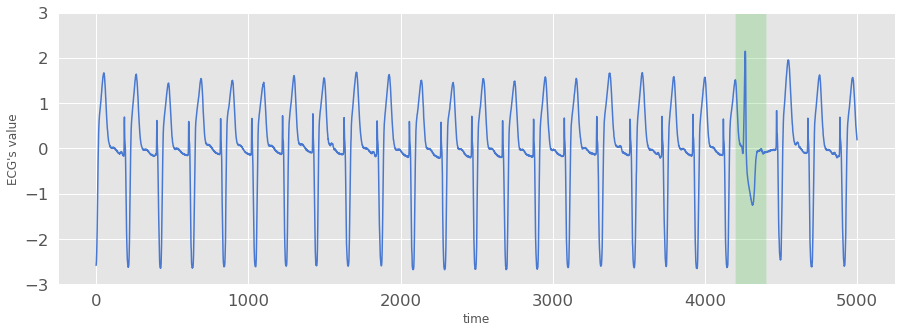

In [239]:
#https://www.renom.jp/notebooks/tutorial/time_series/lstm-anomalydetection/notebook.html

# standardize
scaler = StandardScaler()
std_ecg = scaler.fit_transform(ecg)

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(np.arange(5000), std_ecg[:5000], color='b')
plt.ylim(-3, 3)
x = np.arange(4200,4400)
y1 = [-3]*len(x)
y2 = [3]*len(x)
plt.fill_between(x, y1, y2, facecolor='g', alpha=.3)
plt.show()

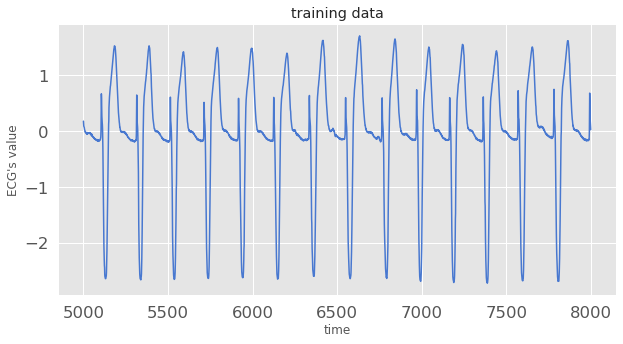

In [240]:
normal_cycle = std_ecg[5000:]

plt.figure(figsize=(10,5))
plt.title("training data")
plt.xlabel('time')
plt.ylabel('ECG\'s value')
plt.plot(np.arange(5000,8000), normal_cycle[:3000], color='b')# stop plot at 8000 times for friendly visual
plt.show()

In [241]:
# create data of the "look_back" length from time-series, "ts"
# and the next "pred_length" values as labels
def create_subseq(ts, look_back, pred_length):
    sub_seq, next_values = [], []
    for i in range(len(ts)-look_back-pred_length):  
        sub_seq.append(ts[i:i+look_back])
        next_values.append(ts[i+look_back:i+look_back+pred_length].T[0])
    return sub_seq, next_values

In [242]:
look_back = 10
pred_length = 3

sub_seq, next_values = create_subseq(normal_cycle, look_back, pred_length)


X_train, X_test, y_train, y_test = train_test_split(
    sub_seq, next_values, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


train_size = X_train.shape[0]
test_size = X_test.shape[0]
print('train size:{}, test size:{}'.format(train_size, test_size))

train size:31989, test size:7998


In [243]:
# model definition
model = rm.Sequential([
    rm.Lstm(35),
    rm.Relu(),
    rm.Lstm(35),
    rm.Relu(),
    rm.Dense(pred_length)
    ])

NameError: name 'rm' is not defined

# Kats

In [1]:
#%%capture
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
import ssl
import certifi
import ssl
import urllib
context = ssl.create_default_context(cafile=certifi.where())
result = urllib.request.urlopen('https://www.example.com', context=context)
ssl._create_default_https_context = ssl._create_unverified_context
# For Google Colab:
!pip3 install --trusted-host pypi.org --trusted-host files.pythonhosted.org kats
    
#!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/air_passengers.csv
#!wget https://raw.githubusercontent.com/facebookresearch/Kats/main/kats/data/multi_ts.csv

Could not fetch URL https://pypi.org/simple/kats/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/kats/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1129)'))) - skipping
ERROR: Could not find a version that satisfies the requirement kats (from versions: none)
ERROR: No matching distribution found for kats
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1129)'))) - skipping


In [486]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

ModuleNotFoundError: No module named 'kats'